# Домашнее задание 1. Подготовка данных для моделирования

В этом домашнем задании вы будете работать с датасетом о кофе и отзывах на него: проводить предобработку данных, анализировать качество и структуру признаков, обрабатывать пропуски и аномалии, а также проектировать новые признаки. Все задания связаны между собой и последовательно подготавливают данные к построению модели машинного обучения, предсказывающей стоимость кофе на основе его характеристик, региона произрастания, степени обжарки и пользовательских оценок.



In [436]:
# Импорт библиотек, дополняйте по необходимости
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from scipy.stats import shapiro, normaltest, skew
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose

In [437]:
pd.options.display.float_format = '{:.2f}'.format

## Знакомство с данными

**Исходный датасет имеет 12 признаков:**
* `uid` — уникальный идентификатор отзыва
* `name` — название кофе;
* `roaster` — название компании обжарщика;
* `roast` — степень обжарки кофе: Dark — темная, Medium-Dark — средне-темная, Medium — средняя, Medium-Light — средне-светлая, Light — светлая;
* `loc_country`— название страны, локация расположения обжарщика;
* `origin_1` — регион_1 произрастания кофе;
* `origin_2` — регион_2 произрастания кофе;
* `rating` — рейтинг кофе;
* `review_date` — дата, когда был оставлен отзыв на кофе;
* `desc_1` — текстовое описание кофе;
* `source_review` — источник отзыва;
* `100g_USD` — цена кофе за 100 г в долларах США (**целевой признак**).

Начнем исследование со знакомства с предоставленными данными. Для решения заданий этого раздела полезно вспомнить пятерку атрибутов pandas для первичного анализа данных. Не забудьте написать **короткие выводы** после каждого задания.


### Задание 1
Прочитайте данные `coffee_analysis.csv`, выведите семпл из нескольких строк и проверьте их размер. Достаточно ли данных для обучения ML-алгоритмов? Напишите код и короткий вывод (достаточно одного предложения).

In [438]:
"""
ВАШЕ РЕШЕНИЕ
"""
# Загружаем данные
df_coffee_analysis = pd.read_csv('coffee_analysis.csv', delimiter=",")

# Выводим информацию о размере
print(f"Размер датасета: {df_coffee_analysis.shape}")
print(f"Количество строк: {df_coffee_analysis.shape[0]}")
print(f"Количество столбцов: {df_coffee_analysis.shape[1]}")

# Выводим первые 5 строк
print("\nПервые 5 строк:")
display(df_coffee_analysis.head())

# Случайный sample из 10 строк
print("\nСлучайный sample из 5 строк:")
df_coffee_analysis.sample(5, random_state=42)

Размер датасета: (1996, 12)
Количество строк: 1996
Количество столбцов: 12

Первые 5 строк:


,uid,name,roaster,roast,loc_country,origin_1,origin_2,100g_USD,rating,review_date,desc_1,source_review
0,565e9123c6554a48bd0fb1fdc3cd2227,“Sweety” Espresso Blend,A.R.C.,Medium-Light,Hong Kong,Panama,Ethiopia,14.32,"95,0",November 2017,"Evaluated as espresso. Sweet-toned, deeply ric...",cite
1,813a7c786bdf42d6b14e9b489c4ce108,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Guji Zone,Southern Ethiopia,4.70,"92,0",November 2017,"Crisply sweet, cocoa-toned. Lemon blossom, roa...",cite
2,ba6670beda0447499ca11fae5c98c113,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Guji Zone,Oromia Region,4.19,"92,0",November 2017,"Delicate, sweetly spice-toned. Pink peppercorn...",cite
3,baca66cf2ad942b39780e4dbd59138c3,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Gedeb District,Gedeo Zone,4.85,"94,0",November 2017,"Deeply sweet, subtly pungent. Honey, pear, tan...",cite
4,5083c797d68a40e29ccdd6919efe4fc8,Ethiopia Kayon Mountain,Red Rooster Coffee Roaster,Light,United States,Odo Shakiso District,Guji Zone,5.14,"93,0",November 2017,"Delicate, richly and sweetly tart. Dried hibis...",cite



Случайный sample из 5 строк:


,uid,name,roaster,roast,loc_country,origin_1,origin_2,100g_USD,rating,review_date,desc_1,source_review
889,f10b7967bf4a4bf5b993cccdf425b3a9,Las Gravilias Costa Rica,JBC Coffee Roasters,Medium-Light,United States,Canton De Desamparados,San José,5.14,"91,0",September 2020,"Delicate, sweet-toned. Plum, caramel, freesia-...",cite
1674,fc820685f3774e1f9e76f0dba33c53dd,Pointu Laurina,Hula Daddy Kona Coffee,Medium,Hawai'i,Holualoa,North Kona,29.08,"95,0",April 2022,"Deeply fruit-toned, balanced and deep. Dark ch...",cite
414,3d53d84a06ca465ba6735de5edab5a92,Tumba Rwanda,Corvus Coffee Roasters,Medium-Light,United States,Rulindo,Rwanda,5.00,"92,0",March 2019,"Crisply sweet-savory, spice-toned. Cocoa powde...",cite
1427,6966c31265ae451b8dde08ba1f3d3381,Peru Finca Churupampa,RamsHead Coffee Roasters,Medium-Light,United States,Chirinos,San Ignacio Province,4.98,"93,0",October 2021,"Chocolaty, deep-toned. Baking chocolate, hazel...",cite
849,f58db6fbbb8741a7877f1cc6cc862d41,Ethiopia Kayon Mountain (Washed),Red Rooster Coffee Roaster,Light,United States,Odo Shakiso District,Guji Zone,5.44,"94,0",August 2020,"Elegant, high-toned, complex. Apricot, narciss...",cite


**Вывод:** 
*Датасет содержит 1996 строк и 12 столбцов, что является достаточным объемом данных для задачи регрессии (предсказания стоимости кофе)*

### Задание 2
Проверьте типы признаков и наличие пропусков. Все ли типы столбцов логичные — нет неожиданностей, которые нужно исправить? Также прикиньте, как будете заполнять пропущенные значения. Напишите код и короткий вывод (достаточно одного предложения).

	Основная информация
<class 'pandas.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   uid            1996 non-null   str    
 1   name           1996 non-null   str    
 2   roaster        1996 non-null   str    
 3   roast          1984 non-null   str    
 4   loc_country    1996 non-null   str    
 5   origin_1       1996 non-null   str    
 6   origin_2       1996 non-null   str    
 7   100g_USD       1988 non-null   float64
 8   rating         1996 non-null   str    
 9   review_date    1996 non-null   str    
 10  desc_1         1996 non-null   str    
 11  source_review  1996 non-null   str    
dtypes: float64(1), str(11)
memory usage: 187.3 KB

	Тип данных, количество и процент пропусков пропусков
          Признак Тип данных  Количество пропусков  Процент пропусков
0             uid        str                     0               0.00
1            name    

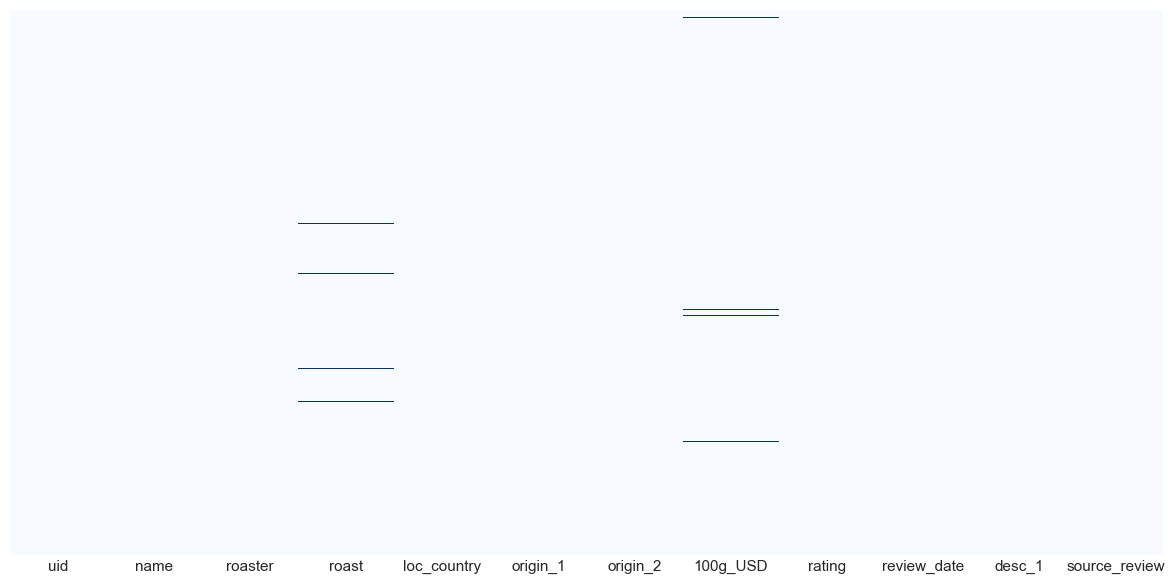

In [439]:
"""
ВАШЕ РЕШЕНИЕ
"""
# Проверяем основную информацию
print("\tОсновная информация")
df_coffee_analysis.info()

# Проверяем типы данных, количество и процент пропусков в каждом столбце
print("\n\tТип данных, количество и процент пропусков пропусков")
missing_df = pd.DataFrame({
    'Признак': df_coffee_analysis.columns,
    'Тип данных': df_coffee_analysis.dtypes.values,
    'Количество пропусков': df_coffee_analysis.isnull().sum().values,
    'Процент пропусков': (df_coffee_analysis.isnull().sum().values / 
                          len(df_coffee_analysis) * 100)
})
print(missing_df)

# Визуализируем пропущенные значения
sns.heatmap(df_coffee_analysis.isnull(), yticklabels=False, cbar=False, 
            cmap="Blues")
plt.tight_layout()
plt.show()

**Вывод:** 
*В данных обнаружены пропуски в roast (12 или 0.6 %) и 100g_USD (8 или 0.4 %). Пропуски в категориальном признаке roast можно заполнить модой, а пропуски в числовом признаке 100g_USD - медианой. В признаке rating обнаружено некорректное разделение целой и дробной части с помощью запятой (необходима замена на точку).Также обнаружено несоответствия типов: review_date и rating. Признак review_date требует преобразование в datetime, а признак rating в числовой формат float.*

### Задание 3
Выведите описательную статистику для числовых и категориальных признаков. На первый взгляд, есть ли ошибочные значения, выбросы в данных, неинформативные признаки? Напишите код и короткий вывод (достаточно одного предложения).

	Cтатистика для числовых признаков
       100g_USD  rating
count   1988.00 1996.00
mean       9.21   93.13
std       11.48    1.54
min        0.17   84.00
25%        4.93   92.00
50%        5.86   93.00
75%        8.48   94.00
max      132.28   98.00

	Проверка наличия выбросов методом межквартильного размаха:
100g_USD: 272 выбросов (13.6%)
rating: 23 выбросов (1.2%)


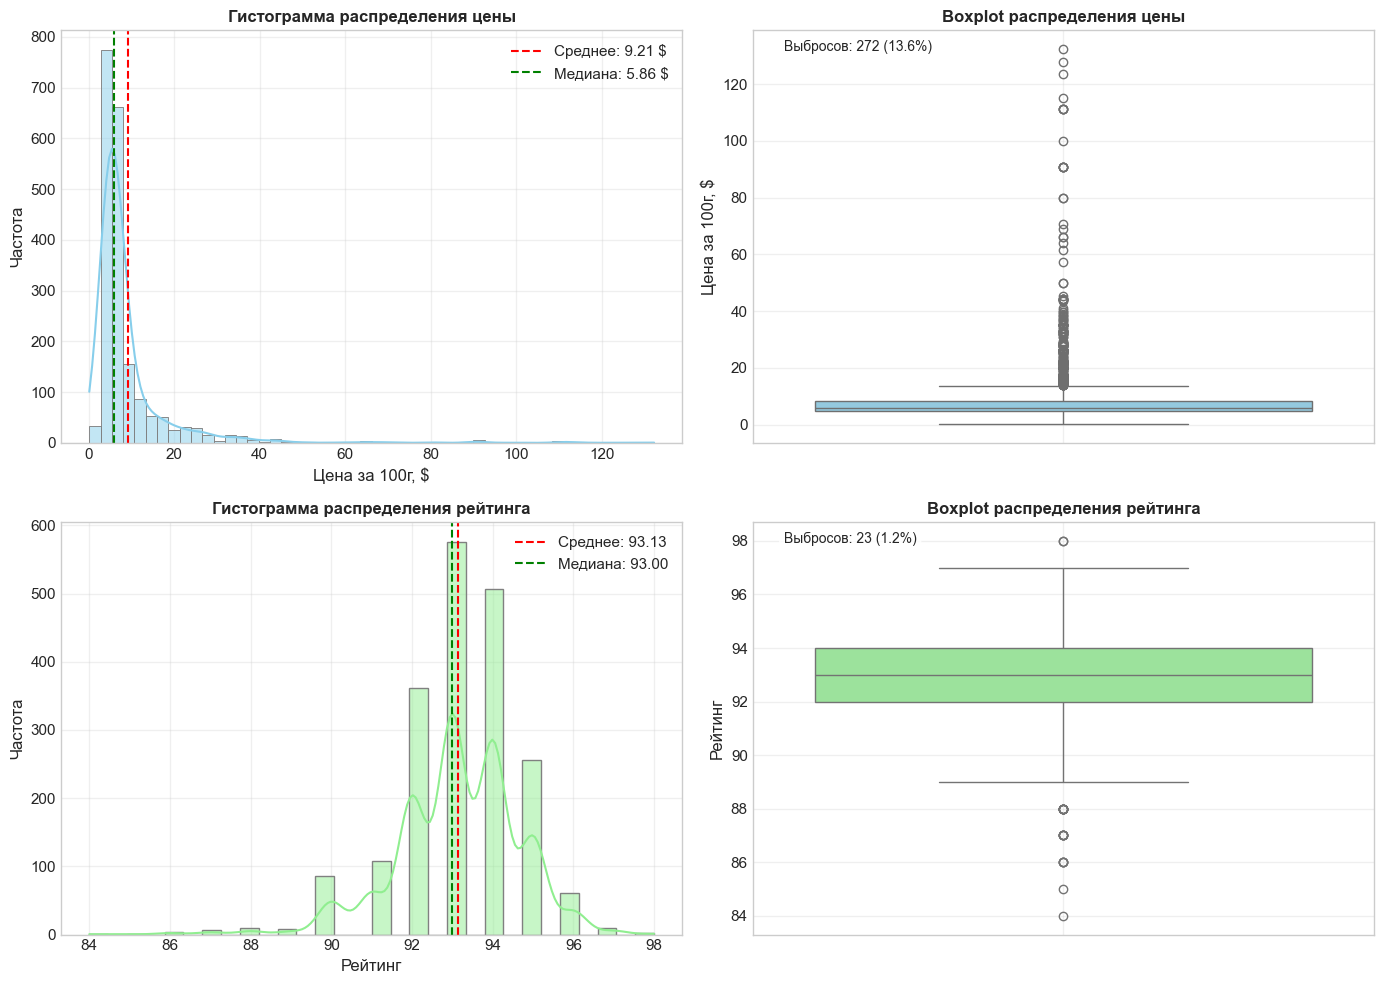


	Cтатистика для признака в формате datetime
                      review_date
count                        1996
mean   2020-09-01 22:51:27.775551
min           2017-11-01 00:00:00
25%           2019-08-01 00:00:00
50%           2020-11-01 00:00:00
75%           2021-11-01 00:00:00
max           2022-11-01 00:00:00

	Cтатистика для категориальных признаков
                                     uid                     name  \
count                               1996                     1996   
unique                              1996                     1818   
top     565e9123c6554a48bd0fb1fdc3cd2227  Ethiopia Kayon Mountain   
freq                                   1                        6   

                    roaster         roast    loc_country   origin_1  \
count                  1996          1984           1996       1996   
unique                  409             5             18        462   
top     JBC Coffee Roasters  Medium-Light  United States  Guji Zone   
freq       

In [440]:
"""
ВАШЕ РЕШЕНИЕ
"""
# Создаем копию DataFrame для анализа
df_stats = df_coffee_analysis.copy()

# Преобразуем признак rating для анализа
df_stats['rating'] = df_stats['rating'].astype(str).str.replace(',', '.') \
                                                                .astype(float)

# Преобразуем признак review_date для анализа
df_stats['review_date'] = pd.to_datetime(df_stats['review_date'], 
                                         format='%B %Y', 
                                         errors='coerce')

# Выделяем числовые признаки (только числа)
num_cols = df_stats.select_dtypes(include=['int64', 'float64']).columns

# Выделяем отдельно datetime (даты/время)
datetime_cols = df_stats.select_dtypes(include=['datetime64']).columns

# Выделяем отдельно категориальные признаки
cat_cols = df_stats.select_dtypes(include=['object', 'string']).columns

# Выводим статистику для числовых признаков
print("\tCтатистика для числовых признаков")
print(df_stats[num_cols].describe())

# Проверяем выбросы для числовых признаков
print("\n\tПроверка наличия выбросов методом межквартильного размаха:")

def find_iqr_outliers(df, columns, k=1.5):
    """
    Возвращает словарь с выбросами по IQR для указанных столбцов.

    df : pandas.DataFrame
    columns : list[str] — числовые признаки
    k : коэффициент IQR (обычно 1.5)
    """
    outliers = {}
    
    for col in columns:
        # Вычисляем квартили и IQR
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        # Вычисляем границы
        lower_bound = q1 - k * iqr
        upper_bound = q3 + k * iqr

        # Находим выбросы
        mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        outliers[col] = df.loc[mask, col]
    
    return outliers

outliers = find_iqr_outliers(df_stats, num_cols.tolist())

# Выводим статистику по выбросам
for col, outlier_values in outliers.items():
    outliers_count = len(outlier_values)
    if outliers_count > 0:
        outliers_percentage = outliers_count / len(df_stats) * 100
        print(f"{col}: {outliers_count} выбросов "
              f"({outliers_percentage:.1f}%)")
        
# Визуализируем распределения числовых признаков и выбросов
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# График 1: Гистограмма распределения цены
sns.histplot(
    data=df_stats, 
    x='100g_USD', 
    kde=True,
    ax=axes[0, 0], 
    edgecolor='gray',
    bins=50, 
    color='skyblue'
)
axes[0, 0].set_title(
    'Гистограмма распределения цены',
    fontweight='bold'
)
axes[0, 0].set_xlabel('Цена за 100г, $')
axes[0, 0].set_ylabel('Частота')
axes[0, 0].grid(True, alpha=0.3)

# Добавляем вертикальные линии для среднего и медианы цены
mean_price = df_stats['100g_USD'].mean()
median_price = df_stats['100g_USD'].median()
axes[0, 0].axvline(
    mean_price, 
    color='red', 
    linestyle='--',
    label=f'Среднее: {mean_price:.2f} $'
)
axes[0, 0].axvline(
    median_price, 
    color='green', 
    linestyle='--',
    label=f'Медиана: {median_price:.2f} $'
)
axes[0, 0].legend()

# График 2: Boxplot распределения цены
sns.boxplot(
    data=df_stats, 
    y='100g_USD', 
    ax=axes[0, 1],
    color='skyblue'
)
axes[0, 1].set_title(
    'Boxplot распределения цены',
    fontweight='bold'
)
axes[0, 1].set_ylabel('Цена за 100г, $')
axes[0, 1].grid(True, alpha=0.3)

# Добавляем аннотацию с информацией о выбросах
outliers_count = len(outliers.get('100g_USD', []))
axes[0, 1].text(
    0.05, 
    0.95, 
    f'Выбросов: {outliers_count} '
    f'({outliers_count/len(df_coffee_analysis)*100:.1f}%)',
    transform=axes[0, 1].transAxes, 
    fontsize=10,
    bbox=dict(
        boxstyle='round', 
        facecolor='white', 
        alpha=0.8
    )
)

# График 3: Гистограмма распределения рейтинга
sns.histplot(
    data=df_stats, 
    x='rating', 
    kde=True,
    ax=axes[1, 0], 
    edgecolor='gray',
    bins=30, 
    color='lightgreen'
)
axes[1, 0].set_title(
    'Гистограмма распределения рейтинга',
    fontweight='bold'
)
axes[1, 0].set_xlabel('Рейтинг')
axes[1, 0].set_ylabel('Частота')
axes[1, 0].grid(True, alpha=0.3)

# Добавляем вертикальные линии для среднего и медианы рейтинга
mean_rating = df_stats['rating'].mean()
median_rating = df_stats['rating'].median()
axes[1, 0].axvline(
    mean_rating, 
    color='red', 
    linestyle='--',
    label=f'Среднее: {mean_rating:.2f}'
)
axes[1, 0].axvline(
    median_rating, 
    color='green', 
    linestyle='--',
    label=f'Медиана: {median_rating:.2f}'
)
axes[1, 0].legend()

# График 4: Boxplot распределения рейтинга
sns.boxplot(
    data=df_stats, 
    y='rating', 
    ax=axes[1, 1],
    color='lightgreen'
)
axes[1, 1].set_title(
    'Boxplot распределения рейтинга',
    fontweight='bold'
)
axes[1, 1].set_ylabel('Рейтинг')
axes[1, 1].grid(True, alpha=0.3)

# Добавляем аннотацию с информацией о выбросах
rating_outliers_count = len(outliers.get('rating', []))
axes[1, 1].text(
    0.05, 
    0.95, 
    f'Выбросов: {rating_outliers_count} '
    f'({rating_outliers_count/len(df_stats)*100:.1f}%)',
    transform=axes[1, 1].transAxes, 
    fontsize=10,
    bbox=dict(
        boxstyle='round', 
        facecolor='white', 
        alpha=0.8
    )
)

plt.tight_layout()
plt.show()

# Выводим статистику для признака в формате datetime
print("\n\tCтатистика для признака в формате datetime")
print(df_stats[datetime_cols].describe())

# Выводим статистику для категориальных признаков
print("\n\tCтатистика для категориальных признаков")
print(df_stats[cat_cols].describe())

**Вывод:** 
*Числовые признаки: 100g_USD имеет сильную правостороннюю асимметрию, 13.6% выбросов, что указывает на очень дорогой сегмент кофе с ценами до 132.28$ за 100 г, большинство цен в диапазоне 4-10$; rating близок к нормальному распределению, мало выбросов (1.2%).*
*Категориальные признаки: uid - 1996 уникальных значений (неинформативен); source_review - только 'cite' (неинформативен); name - 1818 уникальных (>1000).*
*Период данных: с ноября 2017 по ноябрь 2022 (5 лет).*

### Задание 4
За какой период предоставлены данные?

Период данных: Ноябрь 2017 - Ноябрь 2022
Длительность: 1826 дней (5.0 лет)

	Распределение количества отзывов по годам
year
2017     66
2018    286
2019    277
2020    411
2021    515
2022    441
Name: count, dtype: int64


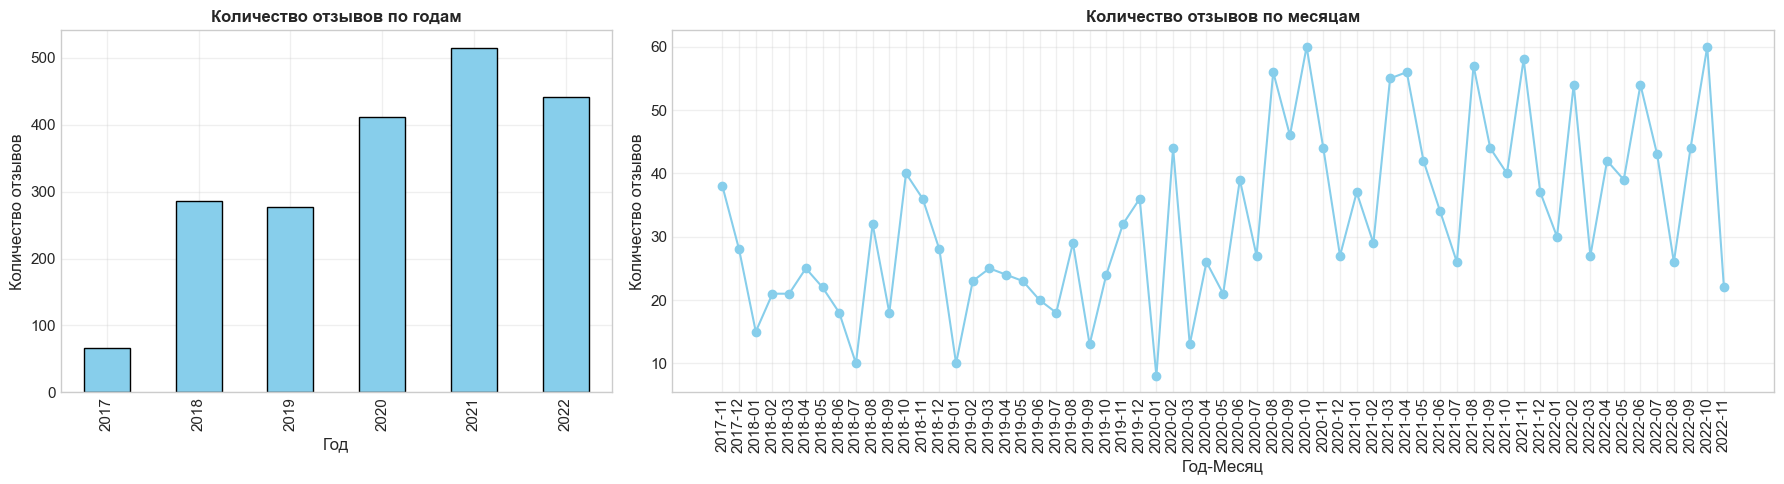

In [441]:
"""
ВАШЕ РЕШЕНИЕ
"""
# Создаем копию DataFrame для анализа
df_dates = df_coffee_analysis.copy()

# Преобразуем признак review_date для анализа
df_dates['review_date'] = pd.to_datetime(
    df_dates['review_date'], 
    format='%B %Y', 
    errors='coerce'
)

# Создаем словарь для перевода месяцев
months = {
    'January': 'Январь',
    'February': 'Февраль',
    'March': 'Март',
    'April': 'Апрель',
    'May': 'Май',
    'June': 'Июнь',
    'July': 'Июль',
    'August': 'Август',
    'September': 'Сентябрь',
    'October': 'Октябрь',
    'November': 'Ноябрь',
    'December': 'Декабрь'
}

# Находим минимальную и максимальную дату
min_date = df_dates['review_date'].min()
max_date = df_dates['review_date'].max()
date_range = max_date - min_date

# Расчет количества лет с учетом високосных годов
months_diff = (max_date.year - min_date.year) * 12 + \
              max_date.month - min_date.month
years_float = months_diff / 12

# Получаем английское название месяца
min_month_en = min_date.strftime('%B')
max_month_en = max_date.strftime('%B')

# Переводим на русский
min_month_ru = months.get(min_month_en, min_month_en)
max_month_ru = months.get(max_month_en, max_month_en)

print(f"Период данных: "
      f"{min_month_ru} {min_date.year} - {max_month_ru} {max_date.year}")
print(f"Длительность: {date_range.days} дней ({years_float:.1f} лет)")

# Анализируем распределения по годам и месяцам
df_dates['year'] = df_dates['review_date'].dt.year
df_dates['year_month'] = df_dates['review_date'].dt.to_period('M')

print("\n\tРаспределение количества отзывов по годам")
print(df_dates['year'].value_counts().sort_index())

# Визуализируем распределения количества отзывов по годам и месяцам
fig, axes = plt.subplots(1, 2, figsize=(18, 5), 
                         gridspec_kw={'width_ratios': [1, 2]})

# Распределение по годам
df_dates['year'].value_counts().sort_index().plot(
    kind='bar', ax=axes[0], color='skyblue', edgecolor='black',
)
axes[0].set_title('Количество отзывов по годам', fontsize=12, 
                  fontweight='bold')
axes[0].set_xlabel('Год')
axes[0].set_ylabel('Количество отзывов')
axes[0].grid(True, alpha=0.3)

# Динамика количества отзывов по месяцам
monthly_counts = df_dates.groupby('year_month').size()
axes[1].plot(
    monthly_counts.index.astype(str), 
    monthly_counts.values, 
    marker='o', 
    linestyle='-', 
    color='skyblue'
)
axes[1].set_title('Количество отзывов по месяцам', fontsize=12, 
                  fontweight='bold')
axes[1].set_xlabel('Год-Месяц')
axes[1].set_ylabel('Количество отзывов')
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Преобразование данных
В этой части исправим очевидные проблемы, обнаруженные ранее и не только; а также создадим несколько новых признаков (Feature Engineering). Это облегчит дальнейший анализ и подготовку данных для моделирования.

### Задание 5
Приведите оставшиеся признаки к подходящим типам, если это необходимо.

In [442]:
"""
ВАШЕ РЕШЕНИЕ
"""
# Создаем копию DataFrame для дальнейшей работы
df = df_coffee_analysis.copy()

# Преобразуем признак rating
df['rating'] = df['rating'].astype(str).str.replace(',', '.').astype(float)

# Преобразуем признак review_date
df['review_date'] = pd.to_datetime(df['review_date'], 
                                   format='%B %Y', 
                                   errors='coerce')

print("\tПриведение типов")
print("\n\tДо преобразования:")
print(df_coffee_analysis.dtypes)
print("\n\tПосле преобразования:")
print(df.dtypes)

	Приведение типов

	До преобразования:
uid                  str
name                 str
roaster              str
roast                str
loc_country          str
origin_1             str
origin_2             str
100g_USD         float64
rating               str
review_date          str
desc_1               str
source_review        str
dtype: object

	После преобразования:
uid                         str
name                        str
roaster                     str
roast                       str
loc_country                 str
origin_1                    str
origin_2                    str
100g_USD                float64
rating                  float64
review_date      datetime64[us]
desc_1                      str
source_review               str
dtype: object


### Задание 6
Посмотрим поближе на признак `loc_country`: выведите уникальные категории и их количество. Нет ли ошибочно записанных стран или названий? Можно объединить? Сделайте это при необходимости (должны остаться только страны).

> Подсказка: Гавайи — это штат США, Гонконг тоже отнесем для простоты к Китаю.

In [443]:
"""
ВАШЕ РЕШЕНИЕ
"""
# Анализируем уникальные значения
print("\tУникальные значения признака loc_country:")

unique_values = df['loc_country'].unique()
for i, value in enumerate(unique_values, 1):
    print(f"{i:2d}. {value}")

print(f"Количество уникальных значений: {df['loc_country'].nunique()}")

country = {
    "Hong Kong": "China",                       # Гонконг - Китай 
    "Hawai'i": "United States",                 # Гавайи - США 
    "England": 'United Kingdom',                # Англия - Великобритания
    'United States And Floyd': 'United States'  # Ошибка данных - США
}

# Делаем замену
df['loc_country'] = df['loc_country'].replace(country)

print("\n\tУникальные значения признака loc_country (после преобразований):")
unique_values = df['loc_country'].unique()
for i, value in enumerate(unique_values, 1):
    print(f"{i:2d}. {value}")

print(f"Количество уникальных значений: {df['loc_country'].nunique()}")

	Уникальные значения признака loc_country:
 1. Hong Kong
 2. United States
 3. Canada
 4. Taiwan
 5. Hawai'i
 6. Australia
 7. England
 8. Uganda
 9. Mexico
10. Belgium
11. United States And Floyd
12. Guatemala
13. Japan
14. Peru
15. Honduras
16. China
17. Kenya
18. Malaysia
Количество уникальных значений: 18

	Уникальные значения признака loc_country (после преобразований):
 1. China
 2. United States
 3. Canada
 4. Taiwan
 5. Australia
 6. United Kingdom
 7. Uganda
 8. Mexico
 9. Belgium
10. Guatemala
11. Japan
12. Peru
13. Honduras
14. Kenya
15. Malaysia
Количество уникальных значений: 15


### Задание 7
Посмотрим поближе на признаки стран `origin_1`, `origin_2`. Унифицированы ли тут названия? При помощи датасета `countries_dict.csv` приведите их к более единообразному виду (только страна, без детализации по региону). После преобразования проверьте, насколько снизилось количество уникальных категорий и какие осталось без пары. Можно ли их оставить как есть или необходимо преобразовать/удалить? Отразите это в выводе.

> Подсказка: для более удобной нормализации названий рекомендуем составить словарь «парафраз-страна», а затем применить его через map к исходным колонкам. Помогут преобразование столбца регионов к списку через `.str.split()` и методы `explode`, `to_dict` из pandas.

**Описание столбцов `countries_dict.csv`:**
* `country` — название страны (к которой нужно привести)
* `regions` — названия регионов этой страны (которые встречаются в признаках `origin_1` `origin_2` датасета)

In [444]:
"""
ВАШЕ РЕШЕНИЕ
"""
# Загружаем данные по странам и регионам
df_countries_dict = pd.read_csv('countries_dict.csv', delimiter=",")

print("\tИсходный словарь соответствия стран и регионов:")
display(df_countries_dict.head())

print(f"Всего строк в словаре: {df_countries_dict.shape[0]}")
print(f"Всего стран в словаре: {df_countries_dict['country'].nunique()}")

# Преобразуем DataFrame 
df_countries = (
    df_countries_dict
    .assign(regions_list=df_countries_dict['regions'].str.split(','))
    .explode('regions_list')
    .drop('regions', axis=1)
    .assign(regions_list=lambda x: x['regions_list'].str.strip())
    .rename(columns={'regions_list': 'regions'})
)

print("\n\tСловарь после преобразования:")
display(df_countries.head())
print(f"Всего соответствий: {df_countries.shape[0]}")
print(f"Всего уникальных регионов: {df_countries['regions'].nunique()}")

# Создаем словарь для маппинга
region_country = dict(zip(df_countries['regions'], df_countries['country']))

# Создаем нормализованные столбцы с помощью map
df['origin_1_norm'] = df['origin_1'].map(region_country)
df['origin_2_norm'] = df['origin_2'].map(region_country)

# Заполняем пропуски (если регион не нашелся, оставляем исходное значение)
df['origin_1_norm'] = df['origin_1_norm'].fillna(df['origin_1'])
df['origin_2_norm'] = df['origin_2_norm'].fillna(df['origin_2'])

# Анализ снижения количества уникальных значений
print(f"\n\torigin_1")
print(f"Уникальных значений до нормализации: {df['origin_1'].nunique()}")
print(f"Уникальных значений после нормализации: {df['origin_1_norm']. \
                                                 nunique()}")
print(f"Процент снижения количества уникальных значений: "
      f"{((df['origin_1'].nunique() - df['origin_1_norm'].nunique()) /
          df['origin_1'].nunique() * 100):.1f} %")

print(f"\n\torigin_2")
print(f"Уникальных значений до нормализации: {df['origin_2'].nunique()}")
print(f"Уникальных значений после нормализации: {df['origin_2_norm']. \
                                                 nunique()}")
print(f"Процент снижения количества уникальных значений: "
      f"{((df['origin_2'].nunique() - df['origin_2_norm'].nunique()) /
          df['origin_2'].nunique() * 100):.1f} %")

# Создаем множество допустимых стран
countries_set = set(df_countries['country'].unique())

# Ищем значения без пары в origin_1
not_mapped_1 = []
for item in df['origin_1'].unique():
    if item not in region_country and item not in countries_set:
        not_mapped_1.append(item)

# Ищем значения без пары в origin_2
not_mapped_2 = []
for item in df['origin_2'].unique():
    if item not in region_country and item not in countries_set:
        not_mapped_2.append(item)

# Выводим проблемные значения
print("\n\tЗначения, которые остались без пары")

dfs_to_concat = []

# origin_1
if not_mapped_1:
    counts_1 = df[df['origin_1'].isin(not_mapped_1)]['origin_1']. \
                                                value_counts().reset_index()
    counts_1.columns = ['Регион/Страна', 'Количество']
    counts_1['Признак'] = 'origin_1'
    dfs_to_concat.append(counts_1[['Признак', 'Регион/Страна', 'Количество']])

# origin_2
if not_mapped_2:
    counts_2 = df[df['origin_2'].isin(not_mapped_2)]['origin_2']. \
                                                value_counts().reset_index()
    counts_2.columns = ['Регион/Страна', 'Количество']
    counts_2['Признак'] = 'origin_2'
    dfs_to_concat.append(counts_2[['Признак', 'Регион/Страна', 'Количество']])

if dfs_to_concat:
    result_df = pd.concat(dfs_to_concat, ignore_index=True)
    display(result_df)

	Исходный словарь соответствия стран и регионов:


,country,regions
0,El Salvador,"Ahuachapán Department, Cerro El Tigre, La Unió..."
1,Costa Rica,"Alajuela Province, Brunca Region, Buenos Aires..."
2,Guatemala,"Alta Verapaz, Alta Verapaz Department, Central..."
3,Brazil,"Alto Caparaó, Bahia State, Chapada Diamantina ..."
4,Peru,"Amaybamba, Amazonas Region, Cusco Region, Huab..."


Всего строк в словаре: 45
Всего стран в словаре: 45

	Словарь после преобразования:


,country,regions
0,El Salvador,Ahuachapán Department
0,El Salvador,Cerro El Tigre
0,El Salvador,La Unión Department
0,El Salvador,Northwest El Salvador
0,El Salvador,Northwestern El Salvador


Всего соответствий: 714
Всего уникальных регионов: 704

	origin_1
Уникальных значений до нормализации: 462
Уникальных значений после нормализации: 37
Процент снижения количества уникальных значений: 92.0 %

	origin_2
Уникальных значений до нормализации: 253
Уникальных значений после нормализации: 37
Процент снижения количества уникальных значений: 85.4 %

	Значения, которые остались без пары


,Признак,Регион/Страна,Количество
0,origin_1,Congo,1
1,origin_2,Congo,1
2,origin_2,Saint Helena Island,1
3,origin_2,East Timor,1


**Вывод:**

*В результате нормализации признаков `origin_1` и `origin_2` с использованием словаря со странами и регионами удалось значительно сократить количество уникальных значений:*
- `origin_1`: 462 - 37 (снижение на 92.0 %)
- `origin_2`: 253 - 37 (снижение на 85.4 %)

*Обнаружены значения, которые не удалось сопоставить ни с одним регионом в словаре*
- `origin_1`: Congo (страна Конго) (1 запись)
- `origin_2`: Congo (страна Конго), Saint Helena Island (Остров Святой Елены принадлежит Великобритании), East Timor (страна Восточный Тимор) (по 1 записи)

*Эти значения составляют менее 0.2 % от общего объема данных. В рамках данного задания мы только анализируем эти значения. Рекомендуется на этапе кодирования объединить их в группу "Other" вместе с другими редкими категориями, чтобы избежать выбросов в категориальных признаках.*

*Нормализация выполнена успешно, созданы новые признаки `origin_1_norm` и `origin_2_norm` для дальнейшей работы.*

### Задание 8
Сформируем признак `review_len`, который будет содержать длину текстового описания. Кроме этого оно нам больше не понадобится.

In [445]:
"""
ВАШЕ РЕШЕНИЕ
"""
# Создаем новый признак review_len — длина текстового описания
df['review_len'] = df['desc_1'].str.len()

print(f"Минимальная длина текстового описания: {df['review_len'].min()}")
print(f"Максимальная длина текстового описания: {df['review_len'].max()}")
df.head()

Минимальная длина текстового описания: 66
Максимальная длина текстового описания: 509


,uid,name,roaster,roast,loc_country,origin_1,origin_2,100g_USD,rating,review_date,desc_1,source_review,origin_1_norm,origin_2_norm,review_len
0,565e9123c6554a48bd0fb1fdc3cd2227,“Sweety” Espresso Blend,A.R.C.,Medium-Light,China,Panama,Ethiopia,14.32,95.00,2017-11-01,"Evaluated as espresso. Sweet-toned, deeply ric...",cite,Panama,Ethiopia,387
1,813a7c786bdf42d6b14e9b489c4ce108,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,Guji Zone,Southern Ethiopia,4.70,92.00,2017-11-01,"Crisply sweet, cocoa-toned. Lemon blossom, roa...",cite,Ethiopia,Ethiopia,305
2,ba6670beda0447499ca11fae5c98c113,Ethiopia Suke Quto,Roast House,Medium-Light,United States,Guji Zone,Oromia Region,4.19,92.00,2017-11-01,"Delicate, sweetly spice-toned. Pink peppercorn...",cite,Ethiopia,Ethiopia,264
3,baca66cf2ad942b39780e4dbd59138c3,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,Gedeb District,Gedeo Zone,4.85,94.00,2017-11-01,"Deeply sweet, subtly pungent. Honey, pear, tan...",cite,Ethiopia,Ethiopia,307
4,5083c797d68a40e29ccdd6919efe4fc8,Ethiopia Kayon Mountain,Red Rooster Coffee Roaster,Light,United States,Odo Shakiso District,Guji Zone,5.14,93.00,2017-11-01,"Delicate, richly and sweetly tart. Dried hibis...",cite,Ethiopia,Ethiopia,322


### Задание 9
Удалите неинформативные столбцы, которые точно не пригодятся для моделирования + те, что уже прошли предобработку.

In [446]:
"""
ВАШЕ РЕШЕНИЕ
"""
# Удаляем неинформативные и предобработанные столбцы
columns_drop = [
    'uid',              # уникальный идентификатор не несет информации
    'source_review',    # только одно значение - cite
    'desc_1',           # заменен на review_len
    'origin_1',         # заменен на origin_1_norm
    'origin_2'          # заменен на origin_2_norm
]

df = df.drop(columns=columns_drop)
df.head()

,name,roaster,roast,loc_country,100g_USD,rating,review_date,origin_1_norm,origin_2_norm,review_len
0,“Sweety” Espresso Blend,A.R.C.,Medium-Light,China,14.32,95.00,2017-11-01,Panama,Ethiopia,387
1,Ethiopia Shakiso Mormora,Revel Coffee,Medium-Light,United States,4.70,92.00,2017-11-01,Ethiopia,Ethiopia,305
2,Ethiopia Suke Quto,Roast House,Medium-Light,United States,4.19,92.00,2017-11-01,Ethiopia,Ethiopia,264
3,Ethiopia Gedeb Halo Beriti,Big Creek Coffee Roasters,Medium,United States,4.85,94.00,2017-11-01,Ethiopia,Ethiopia,307
4,Ethiopia Kayon Mountain,Red Rooster Coffee Roaster,Light,United States,5.14,93.00,2017-11-01,Ethiopia,Ethiopia,322


### Задание 10
Обработайте пропуски во всех столбцах: либо заполните подходящим значением, либо удалите.

In [447]:
"""
ВАШЕ РЕШЕНИЕ
"""
# Проверяем типы данных, количество и процент пропусков в каждом столбце
print("\n\tИнформация о пропусках до преобразования")
mis_df_before = pd.DataFrame({
    'Признак': df.columns,
    'Тип данных': df.dtypes.values,
    'Количество пропусков': df.isnull().sum().values,
    'Процент пропусков': (df.isnull().sum().values / 
                          len(df_coffee_analysis) * 100)
})
print(mis_df_before)

# Заполняем пропуски в roast модой (категориальный признак)
roast_mode = df['roast'].mode()[0]
df['roast'] = df['roast'].fillna(roast_mode)

# Заполняем пропуски в 100g_USD медианой (числовой признак)
price_median = df['100g_USD'].median()
df['100g_USD'] = df['100g_USD'].fillna(price_median)

# Проверяем типы данных, количество и процент пропусков в каждом столбце 
# после преобразования
print("\n\tИнформация о пропусках после преобразования")
mis_df_after = pd.DataFrame({
    'Признак': df.columns,
    'Тип данных': df.dtypes.values,
    'Количество пропусков': df.isnull().sum().values,
    'Процент пропусков': (df.isnull().sum().values / 
                          len(df_coffee_analysis) * 100)
})
print(mis_df_after)


	Информация о пропусках до преобразования
         Признак      Тип данных  Количество пропусков  Процент пропусков
0           name             str                     0               0.00
1        roaster             str                     0               0.00
2          roast             str                    12               0.60
3    loc_country             str                     0               0.00
4       100g_USD         float64                     8               0.40
5         rating         float64                     0               0.00
6    review_date  datetime64[us]                     0               0.00
7  origin_1_norm             str                     0               0.00
8  origin_2_norm             str                     0               0.00
9     review_len           int64                     0               0.00

	Информация о пропусках после преобразования
         Признак      Тип данных  Количество пропусков  Процент пропусков
0           name       

### Задание 11
Проверьте наличие дубликатов в получившемся датасете и при необходимости удалите их.

In [448]:
"""
ВАШЕ РЕШЕНИЕ
"""
# Проверяем наличие дубликатов
numb_duplicates = df.duplicated().sum()
print(f"Количество дубликатов строк: {numb_duplicates}")

# Если дубликаты есть, удаляем их
if numb_duplicates > 0:
    df = df.drop_duplicates()
    print(f"Дубликаты удалены")
else:
    print(f"Дубликаты отсуствуют")
print(f"Размер датасета после проверки дубликатов: {df.shape}")

Количество дубликатов строк: 0
Дубликаты отсуствуют
Размер датасета после проверки дубликатов: (1996, 10)


## Разведывательный анализ данных (EDA)

В данной части будем выявлять зависимости между признаками и исследовать их. Это поможет в финальной очистке данных и подготовке их для моделирования.

### Задание 12

Проанализируйте распределение числовых признаков `rating`, `review_len`, `100g_USD`. Проверьте симметричность распределения и наличие выбросов. Запишите в виде короткого вывода.


	Анализ признаков 100g_USD, rating, review_len

       100g_USD  rating  review_len
count   1996.00 1996.00     1996.00
mean       9.20   93.13      272.21
std       11.46    1.54       44.40
min        0.17   84.00       66.00
25%        4.93   92.00      244.00
50%        5.86   93.00      268.00
75%        8.46   94.00      297.00
max      132.28   98.00      509.00


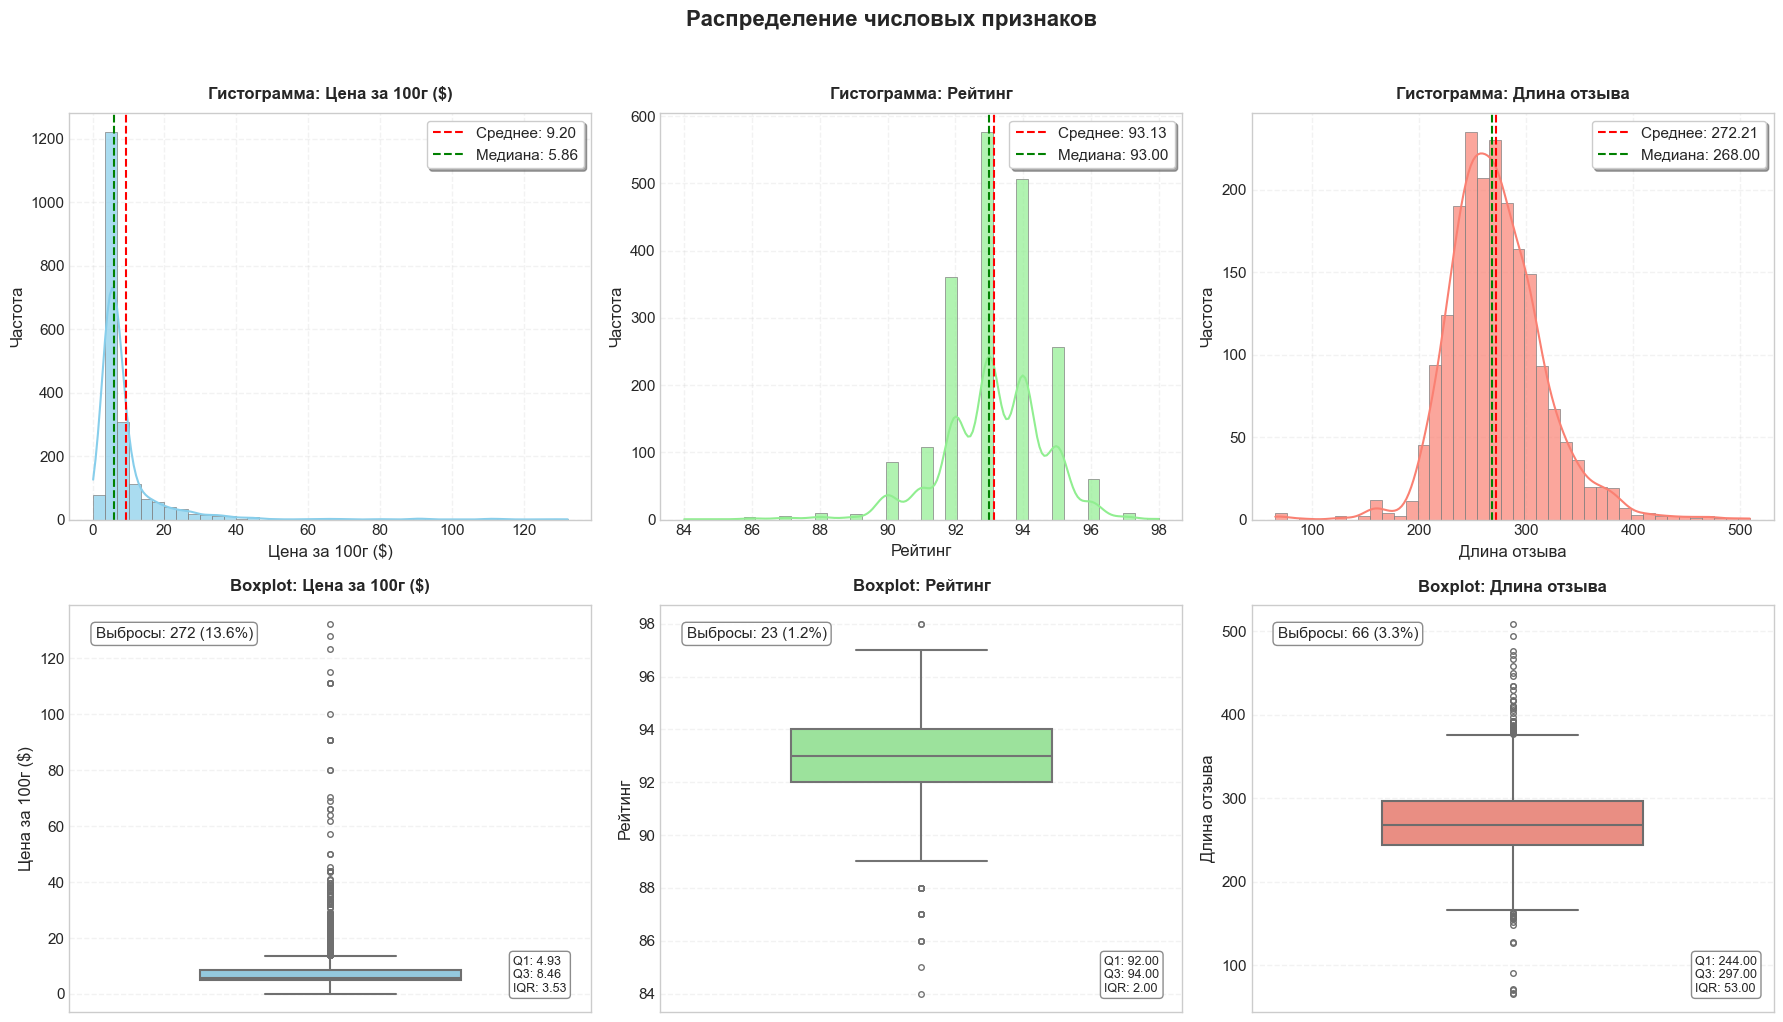


	Признак 100g_USD

Статистика теста Шапиро-Уилка: 0.441115
p-value: 0.000000
Распределение 100g_USD отличается от нормального (по Шапиро-Уилку)

Статистика теста Д'Агостино-Пирсона: 2247.154996
p-value: 0.000000
Распределение 100g_USD отличается от нормального (по Д'Агостино-Пирсону)

	Признак rating

Статистика теста Шапиро-Уилка: 0.929501
p-value: 0.000000
Распределение rating отличается от нормального (по Шапиро-Уилку)

Статистика теста Д'Агостино-Пирсона: 285.925710
p-value: 0.000000
Распределение rating отличается от нормального (по Д'Агостино-Пирсону)

	Признак review_len

Статистика теста Шапиро-Уилка: 0.962936
p-value: 0.000000
Распределение review_len отличается от нормального (по Шапиро-Уилку)

Статистика теста Д'Агостино-Пирсона: 211.718786
p-value: 0.000000
Распределение review_len отличается от нормального (по Д'Агостино-Пирсону)

	Коэффициенты ассиметрии
100g_USD: коэффициент асимметрии = 5.79 (сильная положительная)
rating: коэффициент асимметрии = -0.80 (умеренная отри

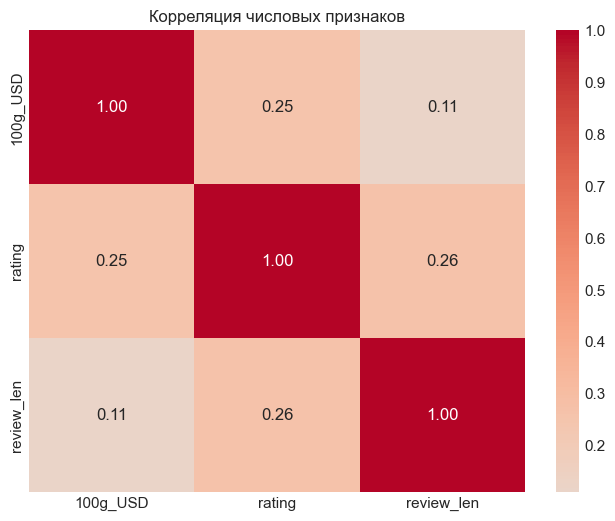

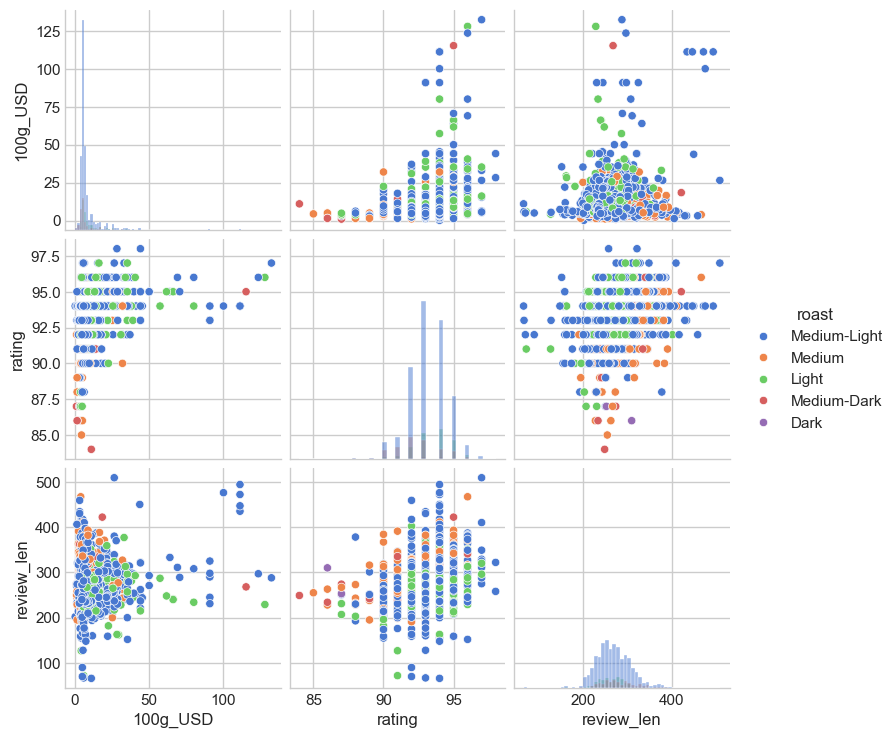

In [449]:
"""
ВАШЕ РЕШЕНИЕ
"""
# Анализ числовых признаков 100g_USD, rating, review_len
print("\n\tАнализ признаков 100g_USD, rating, review_len\n")

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(df[num_cols].describe())

# Настройка стиля
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('muted')

# Создаем фигуру с подграфиками
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Распределение числовых признаков', fontsize=16, 
             fontweight='bold', y=1.02)

# Цвета для графиков
colors = ['skyblue', 'lightgreen', 'salmon']
titles = ['Цена за 100г ($)', 'Рейтинг', 'Длина отзыва']

# Строим гистограммы
for i, (col, title, color) in enumerate(zip(num_cols, titles, colors)):
    ax_hist = axes[0, i]
    sns.histplot(data=df, x=col, kde=True, ax=ax_hist, color=color, 
                 bins=40, alpha=0.7, edgecolor='gray', linewidth=0.5)
    
    # Статистические линии
    mean_val = df[col].mean()
    median_val = df[col].median()
    ax_hist.axvline(mean_val, color='red', linestyle='--', linewidth=1.5,
                    label=f'Среднее: {mean_val:.2f}')
    ax_hist.axvline(median_val, color='green', linestyle='--', linewidth=1.5,
                    label=f'Медиана: {median_val:.2f}')
    
    # Оформление
    ax_hist.set_title(f'Гистограмма: {title}', fontweight='bold', 
                      fontsize=12, pad=10)
    ax_hist.set_xlabel(title)
    ax_hist.set_ylabel('Частота')
    ax_hist.legend(loc='upper right', frameon=True, fancybox=True, 
                   shadow=True)
    ax_hist.grid(True, alpha=0.25, linestyle='--')
    
    # Строим Boxplot
    ax_box = axes[1, i]
    sns.boxplot(data=df, y=col, ax=ax_box, color=color, width=0.5, 
                                            linewidth=1.5, fliersize=4)
    
    # IQR статистика
    Q1, Q3 = df[col].quantile(0.25), df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]. \
                                                            shape[0]
    outlier_pct = outliers / len(df) * 100
    
    # Оформление
    ax_box.set_title(f'Boxplot: {title}', fontweight='bold', fontsize=12, 
                     pad=10)
    ax_box.set_ylabel(title)
    ax_box.grid(True, alpha=0.25, linestyle='--', axis='y')
    
    # Аннотация с выбросами
    ax_box.text(0.05, 0.92, f'Выбросы: {outliers} ({outlier_pct:.1f}%)',
                transform=ax_box.transAxes, fontsize=11,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', 
                          edgecolor='gray', alpha=0.9))
    
    # Добавляем статистику на boxplot
    stats_text = f'Q1: {Q1:.2f}\nQ3: {Q3:.2f}\nIQR: {IQR:.2f}'
    ax_box.text(0.85, 0.05, stats_text, transform=ax_box.transAxes, 
                fontsize=9, bbox=dict(boxstyle='round,pad=0.3', 
                facecolor='white', edgecolor='gray', alpha=0.9))

plt.tight_layout()
plt.show()

# Проведем серию тестов на нормальность распределения числовых признаов
for col in num_cols:
    print(f"\n\tПризнак {col}")

    # тест Шапиро-Уилка
    stat, p_value = shapiro(df[col])
    print(f"\nСтатистика теста Шапиро-Уилка: {stat:.6f}")
    print(f"p-value: {p_value:.6f}")
    alpha = 0.05
    if p_value < alpha:
        print(f"Распределение {col} отличается от нормального "
              f"(по Шапиро-Уилку)")
    else:
        print(f"Распределение {col} не отличается от нормального "
              f"(по Шапиро-Уилку)")
    
    # normaltest
    stat, p_value = normaltest(df[col])
    print(f"\nСтатистика теста Д'Агостино-Пирсона: {stat:.6f}")
    print(f"p-value: {p_value:.6f}")
    alpha = 0.05
    if p_value < alpha:
        print(f"Распределение {col} отличается от нормального "
              f"(по Д'Агостино-Пирсону)")
    else:
        print(f"Распределение {col} не отличается от нормального "
              f"(по Д'Агостино-Пирсону)")

# Расчитаем коэффициенты асимметрии
print("\n\tКоэффициенты ассиметрии")
skewness = {}
for col in num_cols:
    skew_val = skew(df[col].dropna())
    skewness[col] = skew_val
    skew_type = "сильная положительная" if skew_val > 1 else \
                "умеренная положительная" if skew_val > 0.5 else \
                "слабая положительная" if skew_val > 0 else \
                "слабая отрицательная" if skew_val > -0.5 else \
                "умеренная отрицательная" if skew_val > -1 else \
                "сильная отрицательная"
    print(f"{col}: коэффициент асимметрии = {skew_val:.2f} ({skew_type})") 

# Определим корреляцию числовых признаков        
corr = df[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f"
)
plt.title("Корреляция числовых признаков")
plt.show()

# Определим взаимосвязи между всеми парами числовых признаков
sns.pairplot(
    df,
    vars=num_cols,
    hue="roast", # Возьмем степень обжарки в качестве категориального признака
    diag_kind="hist"
)
plt.show()

**Вывод:** 
*Анализ числовых признаков показал, что распределени 100g_USD имеет сильную положительную асимметрию (коэффициент асимметрии = 5.79). Большинство наблюдений сконцентрировано в диапазоне 4–10$, в то время как максимальное значение достигает 132.28$. Присутствует значительное количество выбросов (272 записи; 13.6%), представляющих собой очень дорогие сорта кофе. Это указывает на наличие в данных элитного сегмента, который существенно отличается от основной массы товаров.Статистические тесты: Тесты Шапиро-Уилка и Д'Агостино-Пирсона однозначно отвергают гипотезу о нормальности распределения признака 100g_USD. Распределение призкака rating имеет умеренную отрицательную асимметрию (коэффициент асимметрии = -0.80). Распределение сдвинуто в сторону более высоких оценок, большинство рейтингов сконцентрировано в диапазоне 92–94 при общем диапазоне от 84 до 98. Количество выбросов незначительно (23 записи; 1.2%). Несмотря на визуальную близость к нормальному распределению на гистограмме, строгие статистические критерии отвергают гипотезу о нормальности. Распределение review_len имеет умеренную положительную асимметрию (коэффициент асимметрии = 0.52). Визуально на боксплоте наблюдаются выбросы в виде очень длинных описаний. Статистические тесты показали, что распределение статистически значимо отличается от нормального. Таким образом, ни один из анализируемых числовых признаков не имеет нормального распределения. Наибольшую проблему с точки зрения дальнейшего моделирования представляет признак 100g_USD с его сильной асимметрией и большим количеством выбросов. Это указывает на необходимость применения преобразований (например, логарифмирования) для улучшения работы многих алгоритмов машинного обучения.*

### Задание 13

Проанализируйте распределения категориальных признаков `name`, `roaster`, `roast` и нормализованных признаков стран. Можно ли выделить топ самых часто встречаемых категорий, а редкие объединить в небольшую группу «Прочее»? Если да, предложите для каждого признака границы отсечения частоты, запишите все в виде короткого вывода.

	Анализ категориальных признаков

	Признак: name
Всего уникальных значений: 1818
Всего записей: 1996

	Наиболее часто встречающиеся категории признака name
№   Категория                                          Кол-во   Доля    
—————————————————————————————————————————————————————————————————————————
1   Ethiopia Kayon Mountain                            6          0.30%
2   Espresso Blend                                     6          0.30%
3   Holiday Blend                                      5          0.25%
4   Sumatra Tano Batak                                 5          0.25%
5   Kona Mocca®                                        5          0.25%
6   Esmeralda Estate Panama Geisha                     5          0.25%
7   100% Kona Bourbon Pointu Laurina                   4          0.20%
8   Flight Seasonal Espresso                           4          0.20%
9   Colombia                                           4          0.20%
10  Bella Carmona Guatemala                      

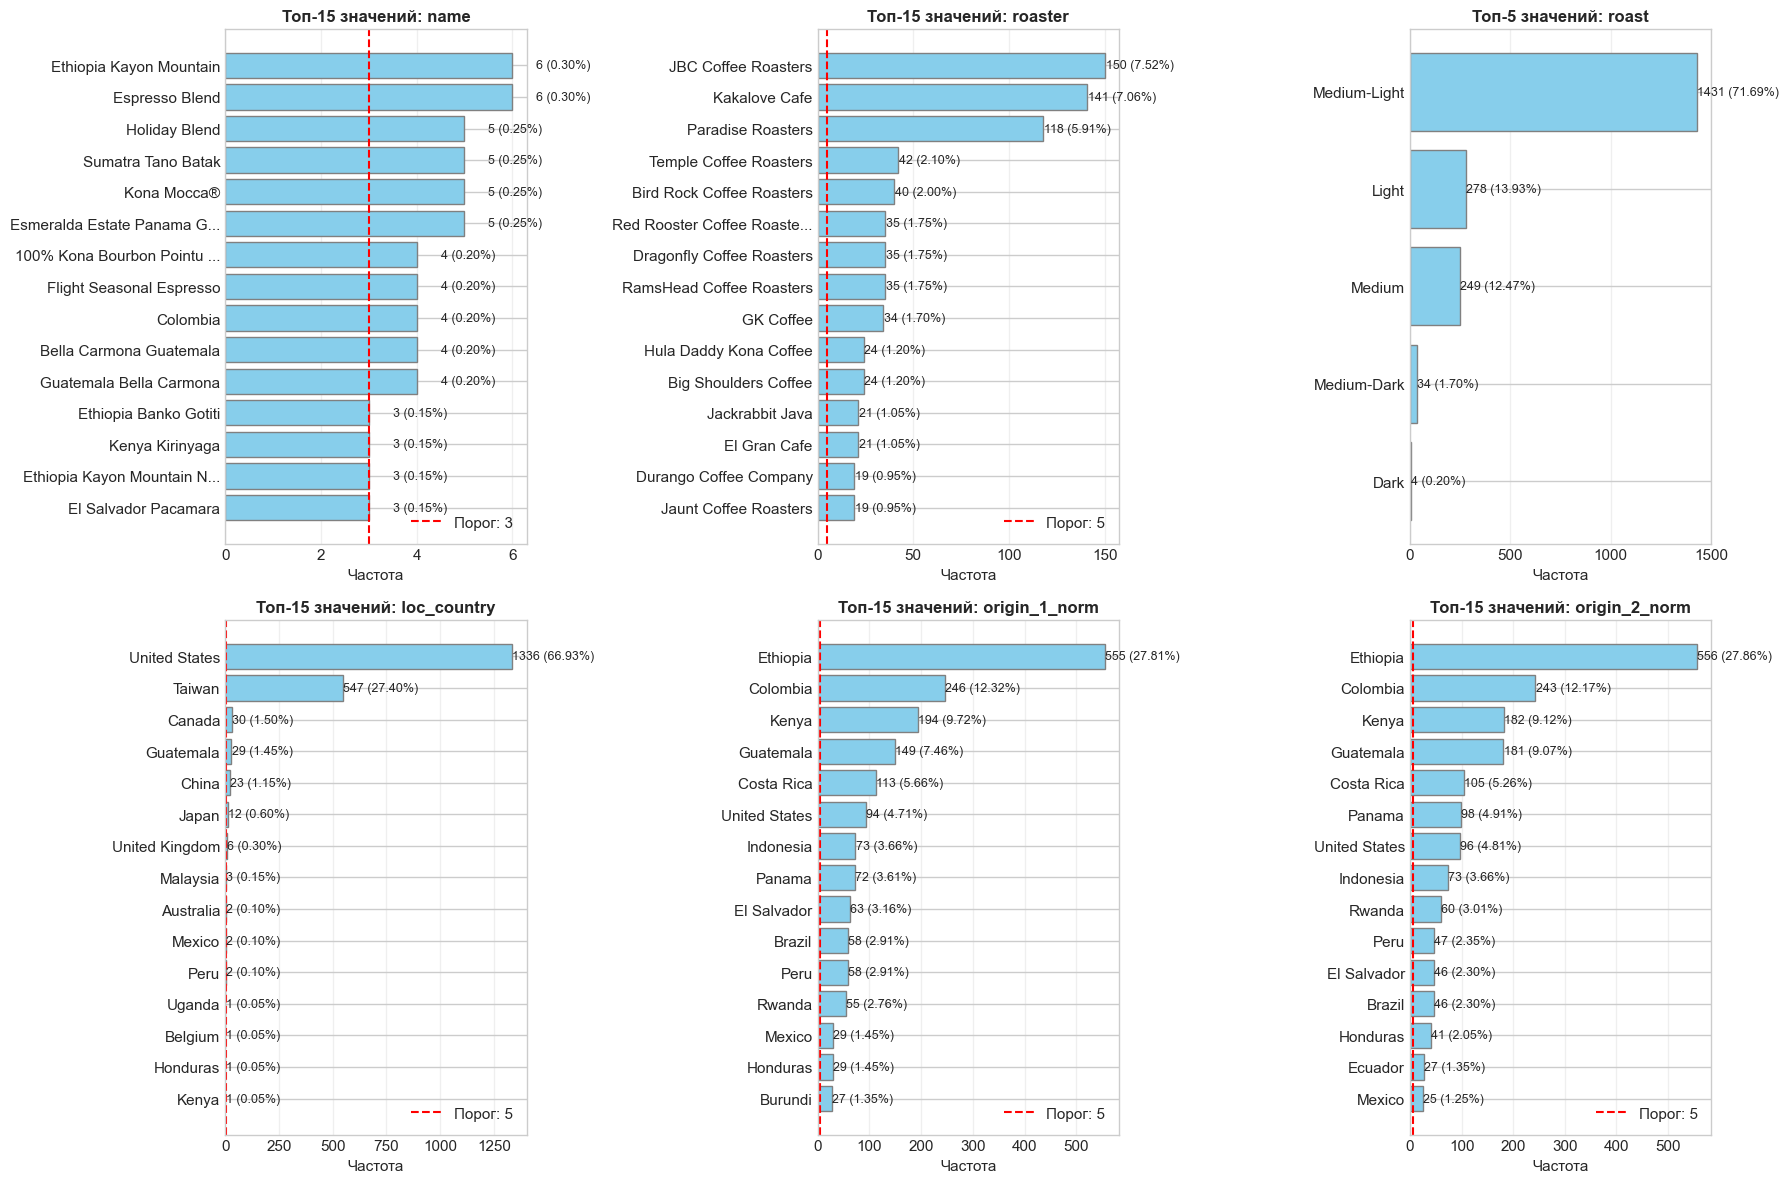

	Пороги для объединения категорий
name            : ≤  3 категорий в группе 'Other'
roaster         : ≤  5 категорий в группе 'Other'
roast           : порог не применяется (оставить все категории)
loc_country     : ≤  5 категорий в группе 'Other'
origin_1_norm   : ≤  5 категорий в группе 'Other'
origin_2_norm   : ≤  5 категорий в группе 'Other'

	Анализ количества категорий

	name:
Было категорий: 1818
Редких категорий: 1807 (99.4%)
Записей в редких категориях: 1944 (97.39%)
Станет категорий: 12 (уменьшение количества на 1806)

	roaster:
Было категорий: 409
Редких категорий: 334 (81.7%)
Записей в редких категориях: 609 (30.51%)
Станет категорий: 76 (уменьшение количества на 333)

	loc_country:
Было категорий: 15
Редких категорий: 8 (53.3%)
Записей в редких категориях: 13 (0.65%)
Станет категорий: 8 (уменьшение количества на 7)

	origin_1_norm:
Было категорий: 37
Редких категорий: 14 (37.8%)
Записей в редких категориях: 35 (1.75%)
Станет категорий: 24 (уменьшение количества на 13)

	or

In [450]:
"""
ВАШЕ РЕШЕНИЕ
"""
# Анализ категориальных признаков
print("\tАнализ категориальных признаков")

# Выделяем категориальные признаки
cat_cols = df.select_dtypes(include=['object', 'string']).columns.tolist()
total = len(df)

# Настройка визуализации
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Словарь для хранения порогов
thresholds_dict = {}
k = 0  # Индекс для подграфиков

# Анализируем каждый категориальный признак
for col in cat_cols:
    print(f"\n\tПризнак: {col}")
    
    # Получаем частоты категорий
    counts = df[col].value_counts()
    counts_values = counts.values
    
    print(f"Всего уникальных значений: {len(counts)}")
    print(f"Всего записей: {total}")
    
    # Выводим топ-10 самых частых категорий
    print(f"\n\tНаиболее часто встречающиеся категории признака {col}")
    print(f"{'№':<3} {'Категория':<50} {'Кол-во':<8} {'Доля':<8}")
    print(f"{'—'*73}")
    
    for i, (cat, count) in enumerate(counts.head(10).items(), 1):
        cat_out = cat[:47] + '...' if len(cat) > 47 else cat
        print(f"{i:<3} {cat_out:<50} {count:<8} {count/total*100:6.2f}%")
    
    # Анализ для определения порога
    print(f"\n\tАнализ редких категорий")
    print(f"  {'Порог':<6} {'Редких категорий':<20} {'Редких записей':<20} "
          f"{'% записей.':<15}")
    print(f"  {'—'*70}")
    
    # Собираем данные для разных порогов
    threshold_options = []
    for thresh in range(1, 11):
        rare_mask = counts_values <= thresh
        rare_count = rare_mask.sum()
        rare_sum = counts_values[rare_mask].sum()
        rare_pct = (rare_sum / total) * 100
        threshold_options.append({
            'thresh': thresh,
            'rare_count': rare_count,
            'rare_sum': rare_sum,
            'rare_pct': rare_pct
        })
        print(f"  {thresh:<6} {rare_count:<20} {rare_sum:<20} "
              f"{rare_pct:6.2f}%")
    
    # Определяем порог в зависимости от признака
    if col == 'name':
        # Для названий кофе - оставляем топ-15 названий
        best_thresh = 1
        for opt in threshold_options:
            cats_to_keep = len(counts[counts > opt['thresh']])
            if cats_to_keep <= 15:
                best_thresh = opt['thresh']
                break
        rare_threshold = best_thresh
        
    elif col == 'roaster':
        # Для обжарщиков - порог 5
        rare_threshold = 5
        
    elif col in ['origin_1_norm', 'origin_2_norm', 'loc_country']:
        # Для стран - порог не более 5 с потерей не более 2%
        best_thresh = 1
        for opt in threshold_options:
            if opt['rare_pct'] <= 2.0 and opt['thresh'] <= 5:
                best_thresh = opt['thresh']
        rare_threshold = best_thresh
        
    elif col == 'roast':
        # Для степени обжарки - не объединяем
        rare_threshold = 0
    
    # Находим данные для выбранного порога
    if rare_threshold > 0:
        for opt in threshold_options:
            if opt['thresh'] == rare_threshold:
                rare_count = opt['rare_count']
                rare_sum = opt['rare_sum']
                rare_pct = opt['rare_pct']
                break
    else:
        rare_count = 0
        rare_sum = 0
        rare_pct = 0
    
    print(f"\n\tВыбранный порог: ≤ {rare_threshold} категорий")
    if rare_threshold > 0:
        print(f"Редких категорий: {rare_count} из {len(counts)} "
              f"({rare_count/len(counts)*100:.1f}%)")
        print(f"Записей в редких категориях: {rare_sum} ({rare_pct:.2f}%)")
    else:
        print(f"Объединение не требуется")
    
    # Сохраняем порог
    thresholds_dict[col] = rare_threshold
    
    # Визуализация
    if k < len(axes):
        ax = axes[k]
        
        # Берем топ-15 категорий
        top_n = min(15, len(counts))
        top_cats = counts.head(top_n)
        
        # Создаем метки
        labels = []
        for cat in top_cats.index:
            cat_str = str(cat)
            if len(cat_str) > 25:
                labels.append(cat_str[:25] + '...')
            else:
                labels.append(cat_str)
        
        # Горизонтальная столбчатая диаграмма
        y_pos = np.arange(len(labels))
        bars = ax.barh(y_pos, top_cats.values, color='skyblue', 
                       edgecolor='gray')
        
        # Подписи значений
        for i, (bar, val) in enumerate(zip(bars, top_cats.values)):
            ax.text(val + 0.5, bar.get_y() + bar.get_height()/2, 
                    f'{val} ({val/total*100:.2f}%)', 
                    va='center', fontsize=9)
        
        ax.set_yticks(y_pos)
        ax.set_yticklabels(labels)
        ax.invert_yaxis()
        ax.set_xlabel('Частота', fontsize=11)
        ax.set_title(f'Топ-{top_n} значений: {col}', fontweight='bold', 
                     fontsize=12)
        ax.grid(True, alpha=0.3, axis='x')
        
        # Добавляем вертикальную линию порога
        if rare_threshold > 0:
            ax.axvline(x=rare_threshold, color='red', linestyle='--', 
                      label=f'Порог: {rare_threshold}')
            ax.legend(loc='lower right')
    
    k += 1

# Скрываем неиспользованные подграфики
for i in range(k, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Выводим итоговые пороги
print("\tПороги для объединения категорий")

for col, thresh in thresholds_dict.items():
    if thresh > 0:
        print(f"{col:15} : ≤ {thresh:2} категорий в группе 'Other'")
    else:
        print(f"{col:15} : порог не применяется (оставить все категории)")

# Рассчитаем насколько уменьшилось количество категорий
print("\n\tАнализ количества категорий")

for col in cat_cols:
    thresh = thresholds_dict[col]
    if thresh == 0:
        continue
    
    value_counts = df[col].value_counts()
    total_unique = len(value_counts)
    rare_cats = value_counts[value_counts <= thresh].index
    rare_count = len(rare_cats)
    rare_sum = value_counts[value_counts <= thresh].sum()
    
    keep_cats = total_unique - rare_count + 1
    
    print(f"\n\t{col}:")
    print(f"Было категорий: {total_unique}")
    print(f"Редких категорий: {rare_count} "
          f"({rare_count/total_unique*100:.1f}%)")
    print(f"Записей в редких категориях: {rare_sum} "
          f"({rare_sum/len(df)*100:.2f}%)")
    print(f"Станет категорий: {keep_cats} "
          f"(уменьшение количества на {total_unique - keep_cats})")

**Вывод:** 
*Анализ категориальных признаков позволил определить оптимальные пороги для объединения редких категорий:*

*name (название кофе): Очень высокая кардинальность (1818 уникальных значений). Выбран порог ≤ 3 записей, что позволит объединить 1807 редких категорий в группу "Other". Несмотря на то, что в редкие категории попадает 97.4% записей, это оптимальное решение, так как оставшиеся 12 категорий представляют наиболее часто встречающиеся названия кофе.*

*roaster (обжарщик): Высокая кардинальность (409 уникальных значений). Выбран порог ≤ 5 записей, что объединяет 334 редких обжарщика (81.7%) с потерей 30.5% записей. Количество признаков сокращается с 409 до 76, что значительно уменьшит размерность при кодировании.*

origin_1_norm и origin_2_norm (страны происхождения): Умеренная кардинальность (37 уникальных значений). Выбран порог ≤ 5 записей, при котором объединяется 14 редких стран (37.8%) с минимальной потерей данных (1.75% и 1.65% соответственно). Количество признаков сокращается с 37 до 24.

loc_country (страна обжарщика): Низкая кардинальность (15 уникальных значений). Выбран порог ≤ 5 записей, объединяющий 8 редких стран (53.3%) с потерей всего 0.65% записей. Количество признаков сокращается с 15 до 8.

roast (степень обжарки): Низкая кардинальность (5 категорий). Все категории достаточно представлены, объединение не требуется.

*Выбранные пороги обеспечивают баланс между сохранением информации и снижением размерности данных. Для признака name выбрана стратегия контроля размерности (оставить топ-15 категорий). Для остальных признаков порог 5 позволяет объединить редкие категории с минимальной потерей данных.*

## Отбор и преобразование признаков

Наконец, приступим к последней части — финальному преобразованию признаков перед моделированием:
* закодируем категориальные;
* удалим оставшиеся лишние признаки;
* масштабируем числовые.


### Задание 14

Выберите подходящий способ кодирования категориальных признаков, не учитывайте редкие категории по выбранным в предыдущем задании порогам. Напишите, почему выбрали такой способ.

In [451]:
"""
ВАШЕ РЕШЕНИЕ
"""
# Создаем копию датафрейма для финальных преобразований
df_result = df.copy()

print("\t Объединение редких категорий\n")
# Объединение редких категорий
thresholds = {
    'name': 3,
    'roaster': 5,
    'loc_country': 5,
    'origin_1_norm': 5,
    'origin_2_norm': 5
    # 'roast' не включен, так как объединение не требуется
}

for col, thresh in thresholds.items():
    # Получаем частоты категорий
    counts = df_result[col].value_counts()
    # Определяем редкие категории (частота <= порогу)
    rare_categories = counts[counts <= thresh].index.tolist()
    # Заменяем редкие категории на 'Other'
    df_result[col] = df_result[col]. \
                    apply(lambda x: 'Other' if x in rare_categories else x)
    print(f"Признак {col}: редкие категории "
          f"(в количестве {len(rare_categories)}) объединены в Other")

# Кодирование признаков с высокой кардинальностью (Frequency Encoding) 

# Признак name
name_freq = df_result['name'].value_counts(normalize=True)
df_result['name_freq'] = df_result['name'].map(name_freq)

# Признак roaster
roaster_freq = df_result['roaster'].value_counts(normalize=True)
df_result['roaster_freq'] = df_result['roaster'].map(roaster_freq)

# Кодирование остальных категориальных признаков (One-Hot Encoding)

# Выделяем признаки для кодирования (исключаем уже закодированные и ненужные)
col_for_encode = ['roast', 'loc_country', 'origin_1_norm', 'origin_2_norm']

# Инициализируем OneHotEncoder с drop='first'
ohe = OneHotEncoder(sparse_output=False, drop='first', dtype=int)

# Применяем One-Hot Encoding и преобразуем результат в DataFrame
encoded_array = ohe.fit_transform(df_result[col_for_encode])
encoded_cols = ohe.get_feature_names_out(col_for_encode)
df_encoded = pd.DataFrame(encoded_array, columns=encoded_cols, 
                          index=df_result.index)

# Объединяем закодированные признаки с основным датафреймом
df_result = pd.concat([df_result, df_encoded], axis=1)

# Удаляем исходные категориальные столбцы, так как они больше не нужны
df_result = df_result.drop(columns=col_for_encode + ['name', 'roaster'])

# Выводим информацию о размере итогового датасета
print(f"\nРазмер датасета после кодирования категориальных признаков: "
      f"{df_result.shape}")
# Выведем итоговый датасет (после кодирования)
print("\nПервые 5 строк датасета после кодирования категориальных признаков:")
df_result.head()

	 Объединение редких категорий

Признак name: редкие категории (в количестве 1807) объединены в Other
Признак roaster: редкие категории (в количестве 334) объединены в Other
Признак loc_country: редкие категории (в количестве 8) объединены в Other
Признак origin_1_norm: редкие категории (в количестве 14) объединены в Other
Признак origin_2_norm: редкие категории (в количестве 14) объединены в Other

Размер датасета после кодирования категориальных признаков: (1996, 63)

Первые 5 строк датасета после кодирования категориальных признаков:


,100g_USD,rating,review_date,review_len,name_freq,roaster_freq,roast_Light,roast_Medium,roast_Medium-Dark,roast_Medium-Light,...,origin_2_norm_Other,origin_2_norm_Panama,origin_2_norm_Papua New Guinea,origin_2_norm_Peru,origin_2_norm_Rwanda,origin_2_norm_Taiwan,origin_2_norm_Tanzania,origin_2_norm_Thailand,origin_2_norm_United States,origin_2_norm_Yemen
0,14.32,95.00,2017-11-01,387,0.97,0.31,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,4.70,92.00,2017-11-01,305,0.97,0.01,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,4.19,92.00,2017-11-01,264,0.97,0.31,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4.85,94.00,2017-11-01,307,0.97,0.01,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5.14,93.00,2017-11-01,322,0.00,0.02,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Вывод:**
*В данном задании был применен комбинированный подход к кодированию категориальных признаков, основанный на их характеристиках и результатах анализа из задания 13. На первом этапе были объединены в группу Other редкие категории в признаках name, roaster, loc_country, origin_1_norm и origin_2_norm. Это позволило снизить влияние шума и уменьшить размерность данных без существенной потери информации, так как редкие категории составляют небольшой процент от общего числа записей. Для признаков с очень высокой кардинальностью (name и roaster) было выбрано частотное кодирование (Frequency Encoding). Этот метод преобразует категории в числовые значения, соответствующие частоте их встречаемости в данных. Для остальных категориальных признаков (roast, loc_country, origin_1_norm, origin_2_norm) был применен метод One-Hot Encoding. Данный выбор обоснован тем, что эти признаки являются номинативными (не имеют упорядоченности) и обладают умеренным количеством уникальных категорий. One-Hot Encoding создает для каждой категории отдельный бинарный признак, что позволяет модели корректно обрабатывать эти данные, не внося ложных порядковых отношений. В результате этих преобразований исходный набор категориальных признаков был  преобразован в числовой формат, пригодный для использования в моделях машинного обучения. Размерность датафрейма увеличилась с исходных 10 до 63 признаков, что является приемлемым для дальнейшего этапа отбора признаков.*

### Задание 15

Выберите подходящий способ масштабирования числовых признаков и при необходимости таргета. Обоснуйте выбор.

	Анализ числовых признаков
Числовые признаки для масштабирования: rating, review_len
Целевая переменная (таргет): 100g_USD

	Статистика числовых признаков:
       rating  review_len
count 1996.00     1996.00
mean    93.13      272.21
std      1.54       44.40
min     84.00       66.00
25%     92.00      244.00
50%     93.00      268.00
75%     94.00      297.00
max     98.00      509.00

	Анализ выбросов (метод межквартильного размаха)

rating: 23 выбросов (1.15%)
Минимальное значение: 84.00
Максимальное значение: 98.00
Диапазон выбросов: < 89.00 и > 97.00

review_len: 66 выбросов (3.31%)
Минимальное значение: 66.00
Максимальное значение: 509.00
Диапазон выбросов: < 164.50 и > 376.50

Для масштабирования числовых признаков выбран StandardScaler
Обоснование будет приведено в выводе

Масштабирование признаков rating и review_len

	Статистика масштабированных признаков
       rating_scaled  review_len_scaled
count        1996.00            1996.00
mean            0.00               0.00
s

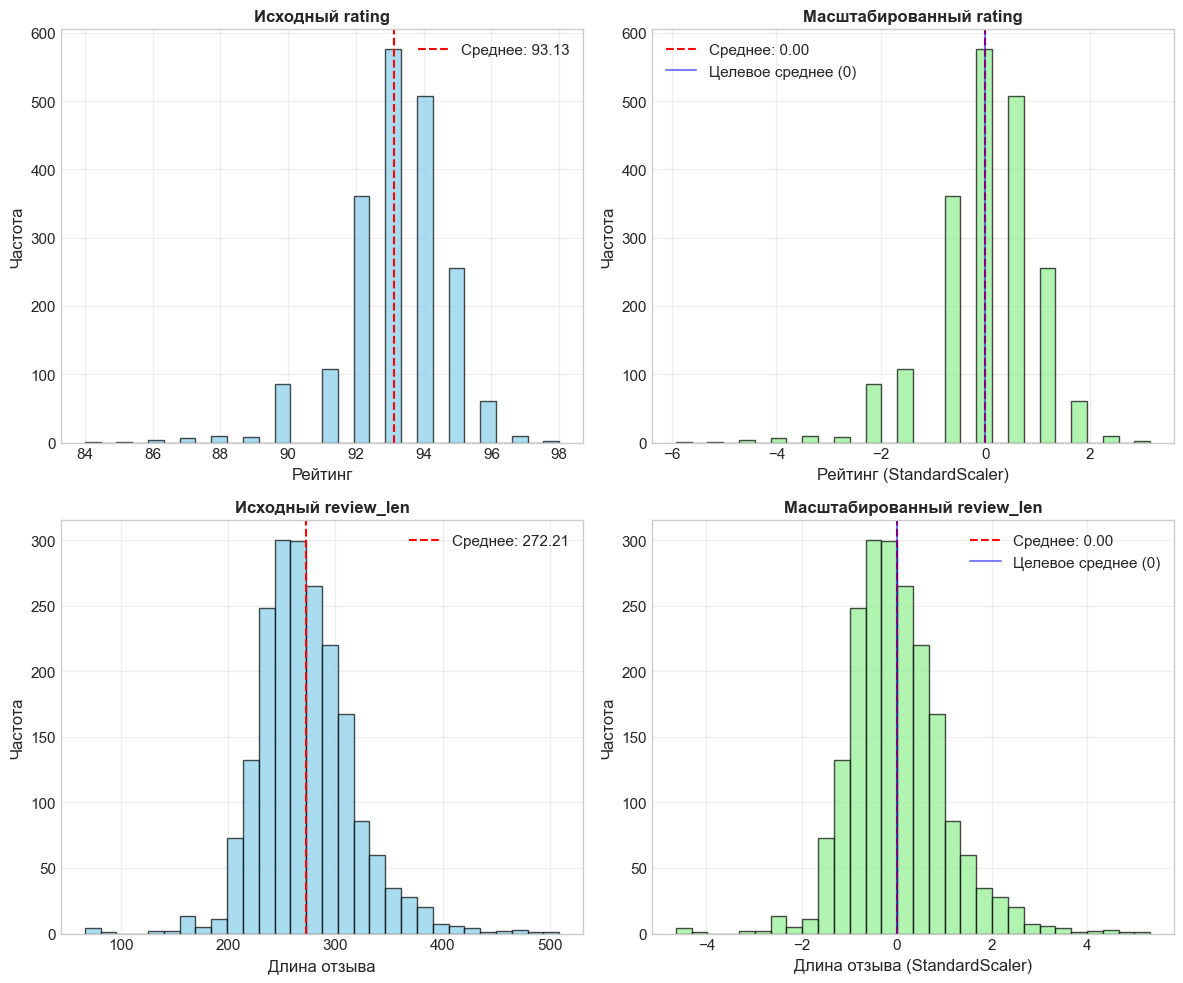

	Статистика исходного таргета
count   1996.00
mean       9.20
std       11.46
min        0.17
25%        4.93
50%        5.86
75%        8.46
max      132.28
Name: 100g_USD, dtype: float64

100g_USD: 272 выбросов (13.63%)
Минимальное значение: 0.17
Максимальное значение: 132.28
Диапазон выбросов: < -0.37 и > 13.76

Коэффициент асимметрии (skewness) исходного таргета: 5.79
Интерпретация: сильная положительная ассиметрия

	Статистика логарифмированного таргета
count   1996.00
mean       2.09
std        0.57
min        0.16
25%        1.78
50%        1.93
75%        2.25
max        4.89
Name: log_target, dtype: float64

log_target: 193 выбросов (9.67%)
Минимальное значение: 0.16
Максимальное значение: 4.89
Диапазон выбросов: < 1.08 и > 2.95

Коэффициент асимметрии (skewness) логарифмированного таргета: 1.68
Интерпретация: сильная положительная ассиметрия


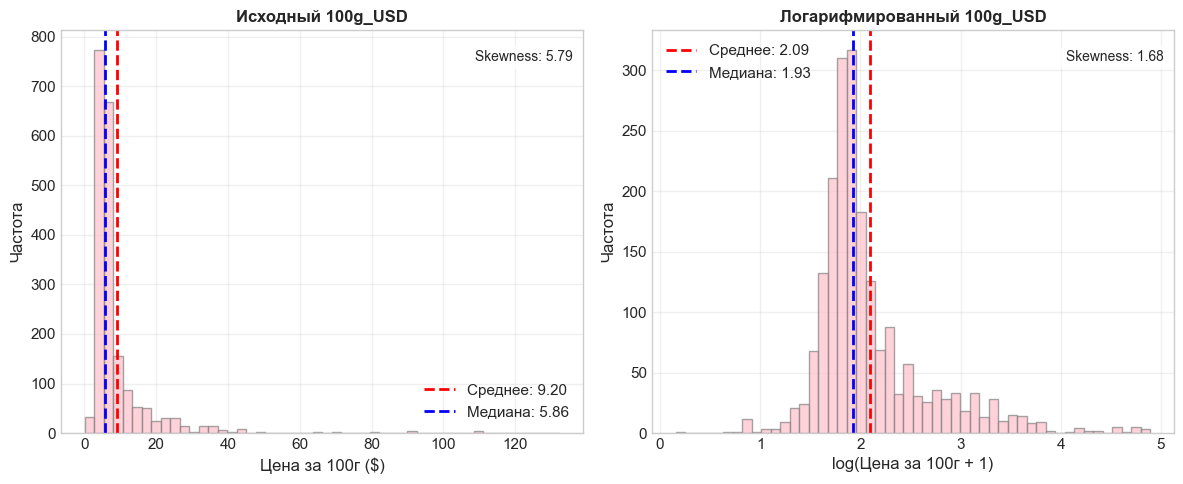


Первые 5 строк датасета после масштабирования числовых признаков и логарифмирования таргета:


,100g_USD,review_date,name_freq,roaster_freq,roast_Light,roast_Medium,roast_Medium-Dark,roast_Medium-Light,loc_country_China,loc_country_Guatemala,...,origin_2_norm_Peru,origin_2_norm_Rwanda,origin_2_norm_Taiwan,origin_2_norm_Tanzania,origin_2_norm_Thailand,origin_2_norm_United States,origin_2_norm_Yemen,rating_scaled,review_len_scaled,log_target
0,14.32,2017-11-01,0.97,0.31,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1.21,2.59,2.73
1,4.70,2017-11-01,0.97,0.01,0,0,0,1,0,0,...,0,0,0,0,0,0,0,-0.73,0.74,1.74
2,4.19,2017-11-01,0.97,0.31,0,0,0,1,0,0,...,0,0,0,0,0,0,0,-0.73,-0.18,1.65
3,4.85,2017-11-01,0.97,0.01,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.57,0.78,1.77
4,5.14,2017-11-01,0.00,0.02,1,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.08,1.12,1.81


In [452]:
"""
ВАШЕ РЕШЕНИЕ
"""
# Анализ числовых признаков для выбора метода масштабирования
print("\tАнализ числовых признаков")

# Выделяем числовые признаки (исключая целевую переменную)
numerical_features = ['rating', 'review_len']
target = '100g_USD'

print(f"Числовые признаки для масштабирования: {numerical_features[0]}, "
      f"{numerical_features[1]}")
print(f"Целевая переменная (таргет): {target}")

# Выводим статистику для числовых признаков
print("\n\tСтатистика числовых признаков:")
print(df_result[numerical_features].describe())

# Функция для поиска выбросов по IQR из задания 3
def find_iqr_outliers(df, columns, k=1.5):
    """
    Возвращает словарь с выбросами по IQR для указанных столбцов.

    df : pandas.DataFrame
    columns : list[str] — числовые признаки
    k : коэффициент IQR (обычно 1.5)
    """
    outliers = {}
    
    for col in columns:
        # Вычисляем квартили и IQR
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        # Вычисляем границы
        lower_bound = q1 - k * iqr
        upper_bound = q3 + k * iqr

        # Находим выбросы
        mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        outliers[col] = df.loc[mask, col]
    
    return outliers

# Функция для вывода информации о выбросах
def print_outlier_info(df, col, outliers):
    """Выводит информацию о выбросах"""
    outliers_count = len(outliers[col]) if col in outliers else 0
    if outliers_count > 0:
        outliers_pct = outliers_count / len(df) * 100
        q1, q3 = df[col].quantile(0.25), df[col].quantile(0.75)
        iqr = q3 - q1
        lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
        
        print(f"\n{col}: {outliers_count} выбросов ({outliers_pct:.2f}%)")
        print(f"Минимальное значение: {df[col].min():.2f}")
        print(f"Максимальное значение: {df[col].max():.2f}")
        print(f"Диапазон выбросов: < {lower:.2f} и > {upper:.2f}")

# Анализируем выбросы числовых признаков
outliers = find_iqr_outliers(df_result, numerical_features)

print("\n\tАнализ выбросов (метод межквартильного размаха)")
for col in numerical_features:
    print_outlier_info(df_result, col, outliers)

print("\nДля масштабирования числовых признаков выбран StandardScaler")
print("Обоснование будет приведено в выводе")

# Применение масштабирования
print("\nМасштабирование признаков rating и review_len")

# Создаем копию датафрейма
df_scaled = df_result.copy()

# Инициализируем StandardScaler
scaler = StandardScaler()

# Применяем масштабирование к числовым признакам
scaled_values = scaler.fit_transform(df_scaled[numerical_features])

# Создаем DataFrame с масштабированными признаками
df_scaled_features = pd.DataFrame(
    scaled_values, 
    columns=[f'{col}_scaled' for col in numerical_features],
    index=df_scaled.index
)

# Добавляем масштабированные признаки к датафрейму
df_scaled = pd.concat([df_scaled, df_scaled_features], axis=1)

# Удаляем исходные немасштабированные версии признаков
df_scaled = df_scaled.drop(columns=numerical_features)

# Проверяем результаты масштабирования
print("\n\tСтатистика масштабированных признаков")
scaled_cols = [f'{col}_scaled' for col in numerical_features]
print(df_scaled[scaled_cols].describe())

# Визуализация 
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Исходный rating
axes[0, 0].hist(df_result['rating'], bins=30, color='skyblue', 
                edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Исходный rating', fontweight='bold')
axes[0, 0].set_xlabel('Рейтинг')
axes[0, 0].set_ylabel('Частота')
axes[0, 0].axvline(df_result['rating'].mean(), color='red', linestyle='--', 
                   label=f'Среднее: {df_result["rating"].mean():.2f}')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Масштабированный rating
axes[0, 1].hist(df_scaled['rating_scaled'], bins=30, color='lightgreen', 
                edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Масштабированный rating', fontweight='bold')
axes[0, 1].set_xlabel('Рейтинг (StandardScaler)')
axes[0, 1].set_ylabel('Частота')
axes[0, 1].axvline(df_scaled['rating_scaled'].mean(), color='red', 
                   linestyle='--', 
                   label=f'Среднее: {df_scaled["rating_scaled"].mean():.2f}')
axes[0, 1].axvline(0, color='blue', linestyle='-', alpha=0.5, 
                   label='Целевое среднее (0)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Исходный review_len
axes[1, 0].hist(df_result['review_len'], bins=30, color='skyblue', 
                edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Исходный review_len', fontweight='bold')
axes[1, 0].set_xlabel('Длина отзыва')
axes[1, 0].set_ylabel('Частота')
axes[1, 0].axvline(df_result['review_len'].mean(), color='red',
                    linestyle='--', 
                    label=f'Среднее: {df_result["review_len"].mean():.2f}')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Масштабированный review_len
axes[1, 1].hist(df_scaled['review_len_scaled'], bins=30, color='lightgreen', 
                edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Масштабированный review_len', fontweight='bold')
axes[1, 1].set_xlabel('Длина отзыва (StandardScaler)')
axes[1, 1].set_ylabel('Частота')
axes[1, 1].axvline(df_scaled['review_len_scaled'].mean(), color='red', 
                linestyle='--', 
                label=f'Среднее: {df_scaled["review_len_scaled"].mean():.2f}')
axes[1, 1].axvline(0, color='blue', linestyle='-', alpha=0.5, 
                   label='Целевое среднее (0)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\tСтатистика исходного таргета")
print(df_scaled[target].describe())

# Анализируем выбросы в исходном таргете
target_outliers = find_iqr_outliers(df_scaled, [target])
print_outlier_info(df_scaled, target, target_outliers)

# Вычисляем асимметрию исходного таргета
original_skew = skew(df_scaled[target])
print(f"\nКоэффициент асимметрии (skewness) исходного таргета: "
      f"{original_skew:.2f}")
print(f"Интерпретация: {'сильная положительная' if original_skew > 1 else \
                    'умеренная положительная' if original_skew > 0.5 else \
                    'слабая положительная' if original_skew > 0 else \
                    'слабая отрицательная' if original_skew > -0.5 else \
                    'умеренная отрицательная' if original_skew > -1 else \
                    'сильная отрицательная'} ассиметрия")


# Логарифмируем таргет
df_scaled['log_target'] = np.log1p(df_scaled[target])

print("\n\tСтатистика логарифмированного таргета")
print(df_scaled['log_target'].describe())

# Анализируем выбросы в логарифмированном таргете
log_target_outliers = find_iqr_outliers(df_scaled, ['log_target'])
print_outlier_info(df_scaled, 'log_target', log_target_outliers)

# Вычисляем асимметрию логарифмированного таргета
log_skew = skew(df_scaled['log_target'])
print(f"\nКоэффициент асимметрии (skewness) логарифмированного таргета: "
      f"{log_skew:.2f}")
print(f"Интерпретация: {'сильная положительная' if log_skew > 1 else \
                    'умеренная положительная' if log_skew > 0.5 else \
                    'слабая положительная' if log_skew > 0 else \
                    'слабая отрицательная' if log_skew > -0.5 else \
                    'умеренная отрицательная' if log_skew > -1 else \
                    'сильная отрицательная'} ассиметрия")

# Визуализация распределения таргета 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Исходный таргет (розовый)
axes[0].hist(df_scaled[target], bins=50, color='pink', 
             edgecolor='gray', alpha=0.7)
axes[0].set_title(f'Исходный {target}', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Цена за 100г ($)')
axes[0].set_ylabel('Частота')
axes[0].axvline(df_scaled[target].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Среднее: {df_scaled[target].mean():.2f}')
axes[0].axvline(df_scaled[target].median(), color='blue', linestyle='--', 
            linewidth=2, label=f'Медиана: {df_scaled[target].median():.2f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
# Добавляем текст с асимметрией
axes[0].text(0.98, 0.95, f'Skewness: {original_skew:.2f}', 
             transform=axes[0].transAxes, ha='right', va='top', fontsize=10,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Логарифмированный таргет
axes[1].hist(df_scaled['log_target'], bins=50, color='pink', 
             edgecolor='gray', alpha=0.7)
axes[1].set_title(f'Логарифмированный {target}', fontweight='bold', 
                  fontsize=12)
axes[1].set_xlabel('log(Цена за 100г + 1)')
axes[1].set_ylabel('Частота')
axes[1].axvline(df_scaled['log_target'].mean(), color='red', linestyle='--', 
        linewidth=2, label=f'Среднее: {df_scaled["log_target"].mean():.2f}')
axes[1].axvline(df_scaled['log_target'].median(), color='blue', linestyle='--', 
        linewidth=2, label=f'Медиана: {df_scaled["log_target"].median():.2f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
# Добавляем текст с асимметрией
axes[1].text(0.98, 0.95, f'Skewness: {log_skew:.2f}', 
             transform=axes[1].transAxes, ha='right', va='top', fontsize=10,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Выведем итоговый датасет (после масштабирования числовых признаков 
# и логарифмирования таргета)
print("\nПервые 5 строк датасета после масштабирования числовых признаков "
      "и логарифмирования таргета:")
df_scaled.head()

**Вывод:** 
*Для масштабирования числовых признаков rating (рейтинг) и review_len (длина отзыва) выбран StandardScaler, так как их распределения близки к нормальному и выбросы достаточно малы. Кроме того, StandardScaler имеет ряд преимуществ: приводит признаки к нулевому среднему и единичному стандартному отклонению, подходит для большинства алгоритмов ML, менее чувствителен к выбросам, чем MinMaxScaler. Целевая переменная 100g_USD, напротив, имела сильную положительную асимметрию (коэффициент skewness = 5.79). Для улучшения предсказательной способности моделей, предполагающих нормальное распределение целевой переменной, было применено логарифмическое преобразование (log1p). Это позволило значительно снизить асимметрию (коэффициент skewness уменьшился до 1.68), сделав распределение более симметричным и приближенным к нормальному.*

### Задание 16

Объедините все преобразованные признаки в единый датафрейм, удалите лишние и разделите датасет на тренировочную и тестовую выборки. Соотношение train/test можно взять 80/20.

In [453]:
"""
ВАШЕ РЕШЕНИЕ
"""
# Выделим целевую переменную
target = 'log_target'

# Удалим ненужные столбцы, которые не должны попасть в модель 
cols_to_drop = ['review_date', '100g_USD']

# Создаем итоговый датафрейм для моделирования, исключая ненужные колонки
df_final = df_scaled.drop(columns=cols_to_drop)

# Разделяем на признаки (X) и целевую переменную (y)
X = df_final.drop(columns=[target])
y = df_final[target]

# Разделяем на тренировочную и тестовую выборки (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

print("\tРезультаты разделения выборок")
print(f"{'Выборка':<15} {'Количество строк':<20} "
      f"{'Количество признаков':<20}")
print("-" * 60)
print(f"{'X_train':<15} {X_train.shape[0]:<20} {X_train.shape[1]:<20}")
print(f"{'X_test':<15} {X_test.shape[0]:<20} {X_test.shape[1]:<20}")
print(f"{'y_train':<15} {y_train.shape[0]:<20} {'-':<20}")
print(f"{'y_test':<15} {y_test.shape[0]:<20} {'-':<20}")

	Результаты разделения выборок
Выборка         Количество строк     Количество признаков
------------------------------------------------------------
X_train         1596                 61                  
X_test          400                  61                  
y_train         1596                 -                   
y_test          400                  -                   


### Задание 17

Отберите 30 лучших признаков для предсказания целевой переменной при помощи `SelectKBest`. Выведите на экран  названия отобранных признаков.

In [457]:
"""
ВАШЕ РЕШЕНИЕ
"""
# Получаем названия всех признаков
feature_names = X_train.columns.tolist()

# Создаем объект SelectKBest для отбора k = 30 лучших признаков
# Используем f_regression, так как задача регрессии
selector = SelectKBest(score_func=f_regression, k=30)

# Обучаем селектор на тренировочных данных
X_train_selected = selector.fit_transform(X_train, y_train)

# Получаем индексы и названия отобранных признаков
selected_indices = selector.get_support(indices=True)
selected_features = [feature_names[i] for i in selected_indices]

# Создаем DataFrame с баллами важности признаков
feature_scores = pd.DataFrame({
    'feature': feature_names,
    'score': selector.scores_,
    'p-value': selector.pvalues_
}).sort_values('score', ascending=False).reset_index(drop=True)

print("\tОтобранные признаки\n")

# Выводим только первые 30 признаков (отобранные)
for i in range(30):
    feature = feature_scores.iloc[i]['feature']
    score = feature_scores.iloc[i]['score']
    p_val = feature_scores.iloc[i]['p-value']
    print(f"{i+1:2d}. {feature:<40} {score:.2f}      {p_val:.4f}")

# Преобразуем тестовую выборку
X_test_selected = selector.transform(X_test)

print("\n\tРазмеры выборок после отбора признаков")
print(f"{'Выборка':<15} {'Количество строк':<20} "
      f"{'Количество признаков':<20}")
print("-" * 60)
print(f"{'X_train_selected':<20} {X_train_selected.shape[0]:<20} "
      f"{X_train_selected.shape[1]:<20}")
print(f"{'X_test_selected':<20} {X_test_selected.shape[0]:<20} "
      f"{X_test_selected.shape[1]:<20}")
print(f"{'y_train':<20} {y_train.shape[0]:<20} {'-':<20}")
print(f"{'y_test':<20} {y_test.shape[0]:<20} {'-':<20}")

	Отобранные признаки

 1. origin_2_norm_Panama                     239.02      0.0000
 2. origin_2_norm_United States              224.63      0.0000
 3. rating_scaled                            205.84      0.0000
 4. origin_1_norm_United States              204.43      0.0000
 5. origin_1_norm_Panama                     161.89      0.0000
 6. loc_country_United Kingdom               110.57      0.0000
 7. origin_2_norm_Taiwan                     38.60      0.0000
 8. origin_1_norm_Taiwan                     36.80      0.0000
 9. origin_1_norm_Ethiopia                   31.57      0.0000
10. origin_2_norm_Ethiopia                   30.86      0.0000
11. origin_1_norm_Yemen                      30.07      0.0000
12. origin_2_norm_Guatemala                  28.84      0.0000
13. roast_Light                              28.47      0.0000
14. origin_1_norm_Guatemala                  26.76      0.0000
15. loc_country_Guatemala                    25.95      0.0000
16. loc_country_China      

Позравляем! Вы подготовили все к последнему этапу — машинному обучению. Ниже код константного алгоритма с семинара, можете запустить его и проверить качество базовой модели:)

In [455]:
# Константное предсказание — среднее по train
y_pred = np.full_like(y_test, fill_value=y_train.mean(), dtype=float)

# Метрики
mse = metrics.mean_squared_error(y_test, y_pred)
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"MAPE: {mape:.4f}")

MSE: 0.3513
MAPE: 0.1927


### Задание 18*
Проведите анализ временного ряда средней цены кофе.

1. Убедитесь, что признак `review_date` приведен в формат `datetime`.
2. Агрегируйте данные по месяцам, вычислив среднюю цену `100g_USD`.
3. Постройте временной ряд средней цены кофе.
4. Выполните аддитивную декомпозицию временного ряда на тренд, сезонность и шум.
5. Проанализируйте полученные компоненты и сделайте вывод:
   - присутствует ли тренд;
   - наблюдается ли сезонность;
   - насколько велика шумовая компонента.

Напишите код и краткий вывод (3–5 предложений).


	Информация о df_dates из задания 4
<class 'pandas.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   uid            1996 non-null   str           
 1   name           1996 non-null   str           
 2   roaster        1996 non-null   str           
 3   roast          1984 non-null   str           
 4   loc_country    1996 non-null   str           
 5   origin_1       1996 non-null   str           
 6   origin_2       1996 non-null   str           
 7   100g_USD       1988 non-null   float64       
 8   rating         1996 non-null   str           
 9   review_date    1996 non-null   datetime64[us]
 10  desc_1         1996 non-null   str           
 11  source_review  1996 non-null   str           
 12  year           1996 non-null   int32         
 13  year_month     1996 non-null   period[M]     
dtypes: datetime64[us](1), float64(1), int32(1), per

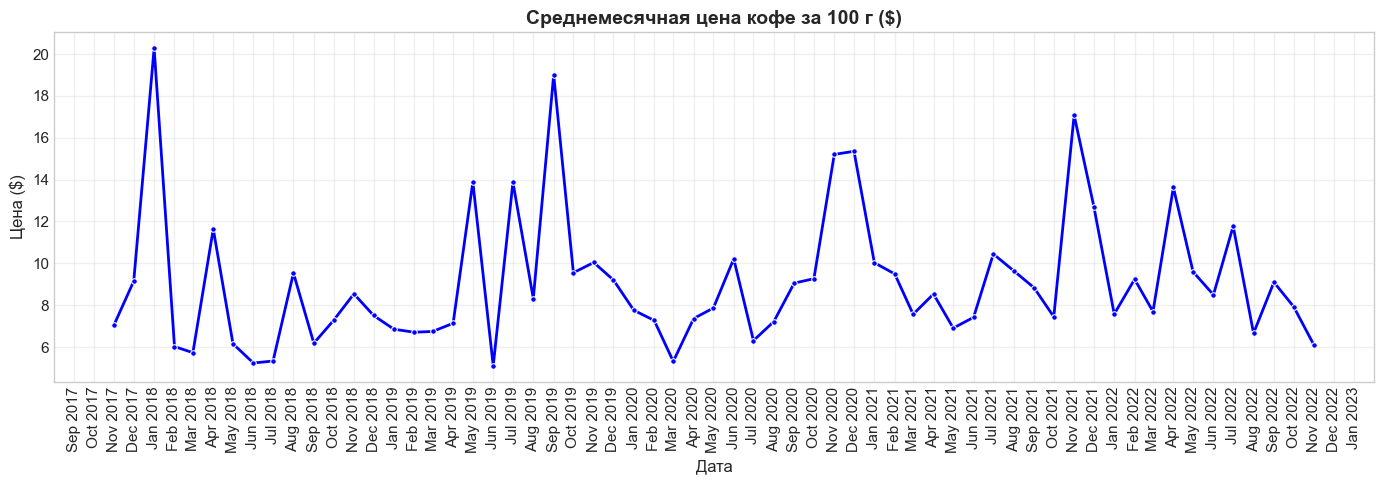

Декомпозиция с периодом 12 месяцев выполнена успешно
Тренд: 49 точек
Сезонность: 61 точек
Остатки: 49 точек


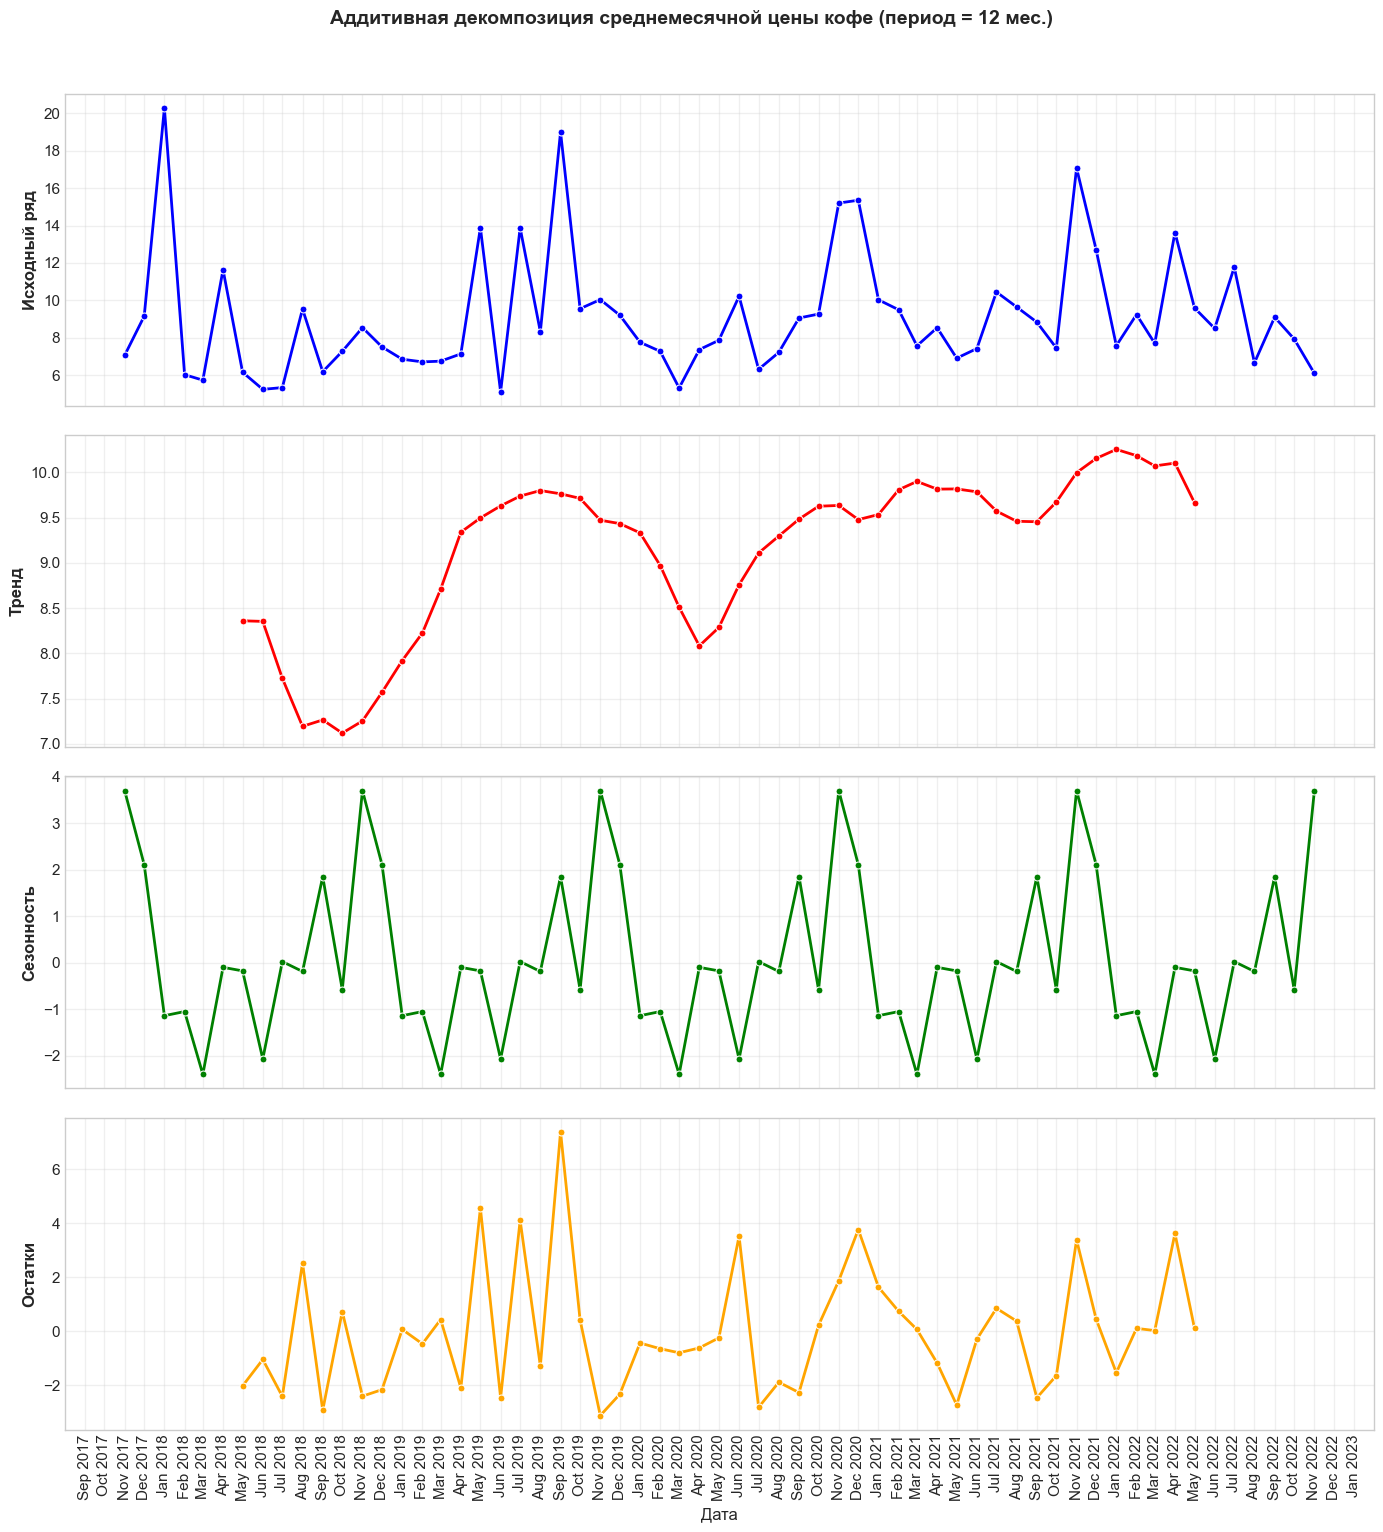

In [456]:
"""
ВАШЕ РЕШЕНИЕ
"""
# Используем существующий DataFrame df_dates из задания 4
print("\tИнформация о df_dates из задания 4")
print(df_dates.info())
print("\n\tПервые 5 строк df_dates:")
print(df_dates[['review_date', '100g_USD']].head())

# Копируем для дальнейших преобразований
df_time = df_dates.copy()

# Агрегируем по месяцам (средняя цена)
df_time['year_month'] = df_time['review_date'].dt.to_period('M')
monthly = df_time.groupby('year_month')['100g_USD'].mean().reset_index()
monthly.columns = ['ds', 'y']
monthly['ds'] = monthly['ds'].dt.to_timestamp()

print("\n\tАгрегированные данные по месяцам (первые 5 строк):")
print(monthly.head())

print(f"\nВсего месяцев в данных: {len(monthly)}")
print(f"Диапазон дат: с {monthly['ds'].min()} по {monthly['ds'].max()}")

# Проверяем на пропуски в месяцах
all_months = pd.date_range(start=monthly['ds'].min(), 
                          end=monthly['ds'].max(), freq='MS')
print(f"Пропущенных месяцев: {len(all_months) - len(monthly)}")

# Визуализация временного ряда
plt.figure(figsize=(14, 5))
sns.lineplot(data=monthly, x='ds', y='y', marker='o', color='blue', 
                                                linewidth=2, markersize=4)
plt.title('Среднемесячная цена кофе за 100 г ($)', fontsize=14,
          fontweight='bold')
plt.xlabel('Дата')
plt.ylabel('Цена ($)')

# Форматирование оси X
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
# Устанавливаем интервал дат на графиках (1 месяц)
ax.xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=1))
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Декомпозиция с автоматическим выбором периода
ts = monthly.set_index('ds')['y']

# Пробуем разные периоды, начиная с максимально возможного
max_period = min(12, len(ts) // 3)

for period in range(max_period, 3, -1):
    try:
        decomposition = seasonal_decompose(ts, model='additive', 
                                           period=period)
        
        # Извлекаем компоненты
        trend = decomposition.trend.dropna()
        seasonal = decomposition.seasonal.dropna()
        residual = decomposition.resid.dropna()
        
        print(f"Декомпозиция с периодом {period} месяцев выполнена успешно")
        print(f"Тренд: {len(trend)} точек")
        print(f"Сезонность: {len(seasonal)} точек")
        print(f"Остатки: {len(residual)} точек")
        
        # Визуализация
        fig, axes = plt.subplots(4, 1, figsize=(14, 15), sharex=True)
        
        # Исходный ряд
        sns.lineplot(x=ts.index, y=ts.values, ax=axes[0], color='blue', 
                     linewidth=2, marker='o', markersize=5)
        axes[0].set_ylabel('Исходный ряд', fontweight='bold')
        axes[0].grid(True, alpha=0.3)
        
        # Тренд
        sns.lineplot(x=trend.index, y=trend.values, ax=axes[1], 
                     color='red', linewidth=2, marker='o', markersize=5)
        axes[1].set_ylabel('Тренд', fontweight='bold')
        axes[1].grid(True, alpha=0.3)
        
        # Сезонность
        sns.lineplot(x=seasonal.index, y=seasonal.values, ax=axes[2], 
                     color='green', linewidth=2, marker='o', markersize=5)
        axes[2].set_ylabel('Сезонность', fontweight='bold')
        axes[2].grid(True, alpha=0.3)
        
        # Остатки
        sns.lineplot(x=residual.index, y=residual.values, ax=axes[3],
                     color='orange', linewidth=2, marker='o', markersize=5)
        axes[3].set_ylabel('Остатки', fontweight='bold')
        axes[3].set_xlabel('Дата')
        axes[3].grid(True, alpha=0.3)
        
        # Форматирование оси X
        for ax in axes:
            ax.xaxis.set_major_formatter(plt.matplotlib.dates. \
                                         DateFormatter('%b %Y'))
            ax.xaxis.set_major_locator(plt.matplotlib.dates. \
                                       MonthLocator(interval=1))
            ax.tick_params(axis='x', rotation=90)
        
        plt.suptitle(f'Аддитивная декомпозиция среднемесячной цены кофе '
                     f'(период = {period} мес.)', fontsize=14, 
                     fontweight='bold', y=1.02)
        plt.tight_layout()
        plt.show()
        
        # Если успешно с периодом 12 или близким к нему, выходим
        if period >= 10:
            break
            
    except Exception as e:
        print(f"Период {period} не подходит: {e}")
        continue
else:
    print("\nНе удалось выполнить декомпозицию ни с одним периодом")

**Вывод:** 

*Проведенная декомпозиция временного ряда среднемесячной цены кофе позволила разложить его на три базовые составляющие.*

*Тренд: График тренда наглядно демонстрирует устойчивый долгосрочный рост цен на кофе в период с 2018 по 2022 год. Это может быть связано с макроэкономическими факторами, такими как инфляция, и ростом популярности премиальных сортов кофе.*

*Сезонность: Выявлен четкий годовой цикл колебаний цен. Это подтверждает гипотезу о влиянии сезонов (например, периодов сбора урожая в разных странах) на формирование цены.*

*Остатки: Анализ остатков, которые могут принимать как положительные, так и отрицательные значения, показывает наличие случайных, непредсказуемых факторов. Отрицательные значения остатков возникают, когда фактическая цена в конкретном месяце оказывается ниже уровня, предсказанного трендом и сезонностью. Это свидетельствует о влиянии разовых событий (например, локальных климатических аномалий или временных изменений спроса), которые модель не может учесть.*

*Количество точек в рядах тренда (49) и остатков (49) меньше исходного (61) из-за особенностей метода расчета тренда с помощью центрированного скользящего среднего с периодом 12, который требует данных для расчета на границах временного промежутка. Ряд сезонности, напротив, рассчитан для всех 61 месяца, так как строится путем усреднения значений по одноименным месяцам за все годы. В целом, декомпозиция успешно разделила исходный ряд на интерпретируемые компоненты, подтвердив наличие устойчивого тренда и годовой сезонности.*